In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimize
import scipy.linalg as linalg
import scipy.stats as stats
import seaborn as sns

plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18

# Best fit dos 32 dados de H(z)

In [4]:
zszi, hzi, hzi_err, metodo = np.genfromtxt("dados/Hz32Clocks.txt", comments='#', usecols=(0,1,2,3), unpack=True, dtype=('f8', 'f8', 'f8', 'U1'))

zmod, imf, slib, sps, spsooo = np.genfromtxt("dados/data_MM20.dat", comments='#', usecols=(0,1,2,3,4), unpack=True)

In [5]:
planck_h0 = 67.36
planck_h0err = 0.54
planck_om = 0.3153

In [6]:
def HzLCDM(z, Om, H0):
    return H0*np.sqrt((Om*((1 + z)**3) + 1 - Om))

In [7]:
z = np.arange(0, 2.1, 0.05)

popt, pcov = optimize.curve_fit(HzLCDM, zszi, hzi, bounds=(0, 70))

omegaErro = np.round(np.sqrt(pcov[0][0]), 3)
hErro = np.round(np.sqrt(pcov[1][1]), 2)
covar = np.round(pcov[0][1], 2)

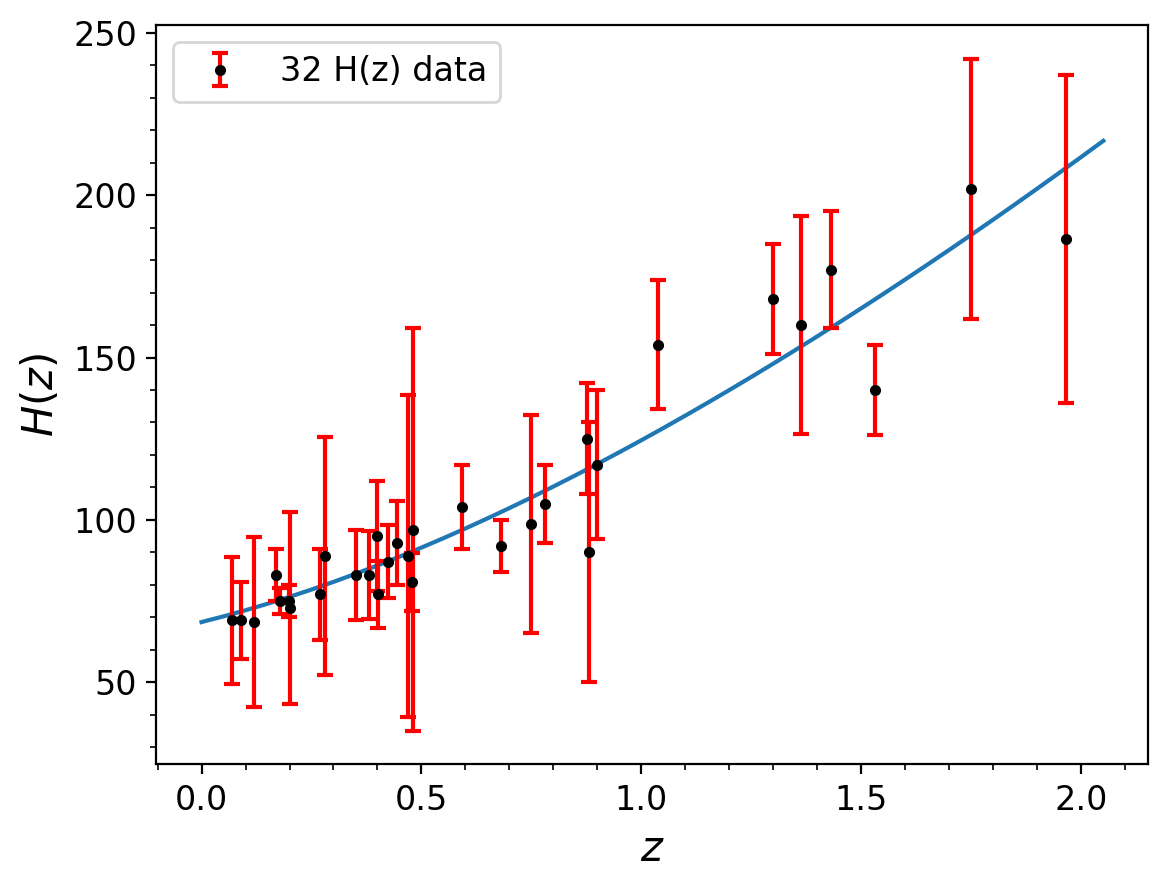

Valores de best fit:
H0 = 68.51 +/- 3.62
Om = 0.329 +/- 0.052


In [8]:
plt.plot(z, HzLCDM(z, Om = popt[0], H0 = popt[1]))
plt.errorbar(zszi, hzi, yerr=hzi_err, fmt=".", color="black", ecolor="red", label="32 H(z) data", capsize=3, capthick=1.5)

#plt.xticks(np.arange(0, max(zDados)+0.1, 0.1))
#plt.yticks(np.arange(25, 251, 25))
#plt.grid(linestyle='-.', linewidth='0.5')
plt.minorticks_on()

plt.ylabel('$H(z)$', fontsize=15)
plt.xlabel('$z$', fontsize=15)
plt.legend(loc='upper left')
plt.show()

print(f"Valores de best fit:\nH0 = {np.round(popt[1], 2)} +/- {hErro}\nOm = {np.round(popt[0], 3)} +/- {omegaErro}")

#plt.savefig('32HzFit.pdf')

In [15]:
planckBest_hz = HzLCDM(z, planck_om, planck_h0)
planckSup_hz = HzLCDM(z, planck_om, planck_h0 + planck_h0err)
planckBel_hz = HzLCDM(z, planck_om, planck_h0 - planck_h0err)

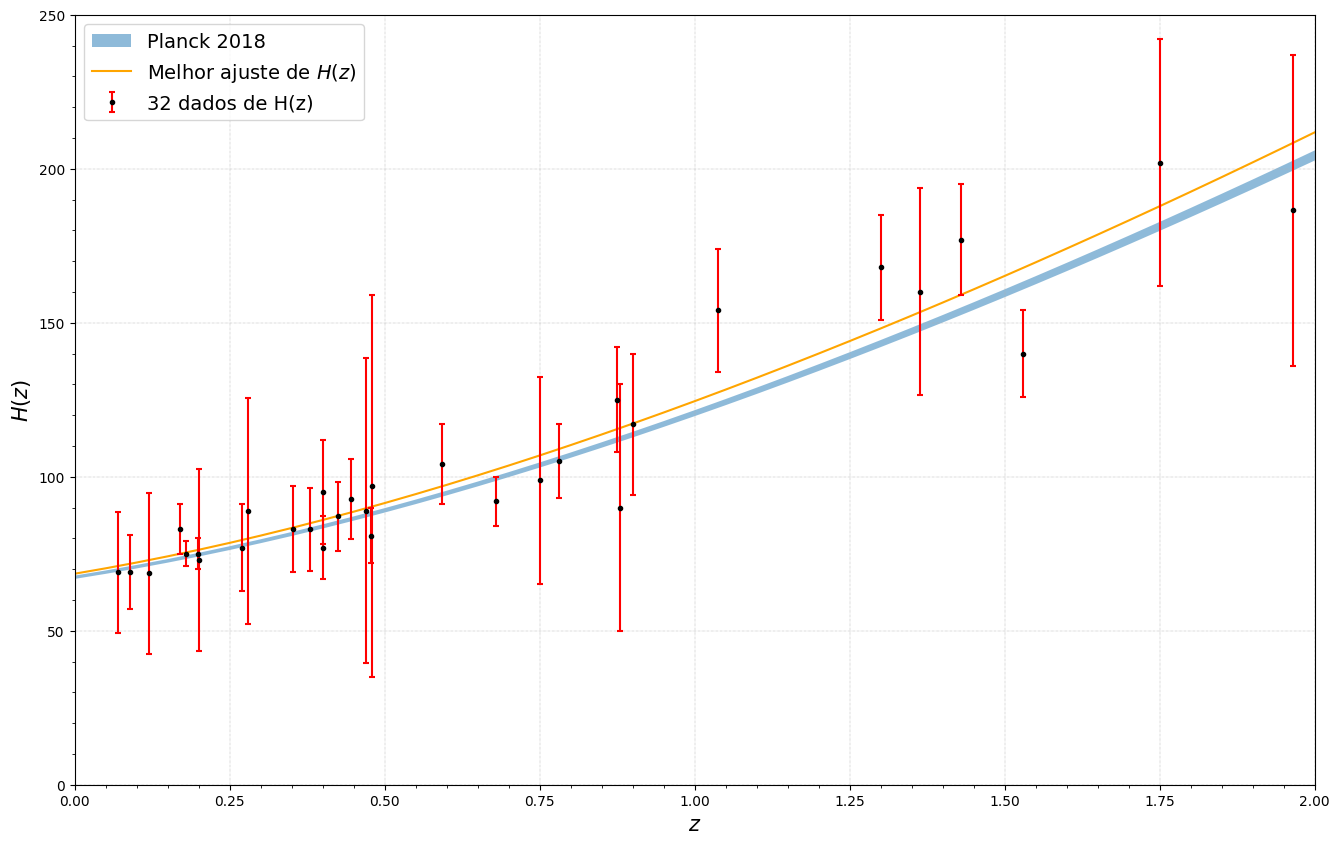

In [63]:
plt.fill_between(z, planckBel_hz, planckSup_hz, alpha=0.5, label='Planck 2018')

plt.plot(z, HzLCDM(z, Om = popt[0], H0 = popt[1]), color='orange', label='Melhor ajuste de $H(z)$')
plt.errorbar(zszi, hzi, yerr=hzi_err, fmt=".", color="black", ecolor="red", label="32 dados de H(z)", capsize=2, capthick=1.5)

plt.ylabel('$H(z)$', fontsize=15)
plt.xlabel('$z$', fontsize=15)

fig1 = plt.gcf()
fig1.set_figwidth(16)
fig1.set_figheight(10)
plt.xlim(0,2)
plt.ylim(0, 250)
plt.grid(linestyle='-.', linewidth='0.3')
plt.minorticks_on()

plt.legend(fontsize=14)
plt.savefig("bestfit_CC.pdf")
plt.show()

# Análise dos erros

In [6]:
hzi_FSF = []
zszi_FSF = []
hziErr_FSF = []
hzi_D4000 = []
zszi_D4000 = []
hziErr_D4000 = []

for i in range(0, len(zszi)):
    if metodo[i] == "F":
        hzi_FSF.append(hzi[i])
        zszi_FSF.append(zszi[i])
        hziErr_FSF.append(hzi_err[i])
    elif metodo[i] == 'D':
        hzi_D4000.append(hzi[i])
        zszi_D4000.append(zszi[i])
        hziErr_D4000.append(hzi_err[i])

hzi_FSF = np.array(hzi_FSF)
zszi_FSF = np.array(zszi_FSF)
hziErr_FSF = np.array(hziErr_FSF)
#Corr_hziErr_FSF = 0.728*hziErr_FSF
hzi_D4000 = np.array(hzi_D4000)
zszi_D4000 = np.array(zszi_D4000)
hziErr_D4000 = np.array(hziErr_D4000)
#Corr_hziErr_D4000 = 0.728*hziErr_D4000

In [7]:
hz_lcdm_FSF = HzLCDM(zszi_FSF, planck_om, planck_h0)
hz_lcdm_D4000 = HzLCDM(zszi_D4000, planck_om, planck_h0)

res_FSF = hzi_FSF - hz_lcdm_FSF
res_D4000 = hzi_D4000 - hz_lcdm_D4000

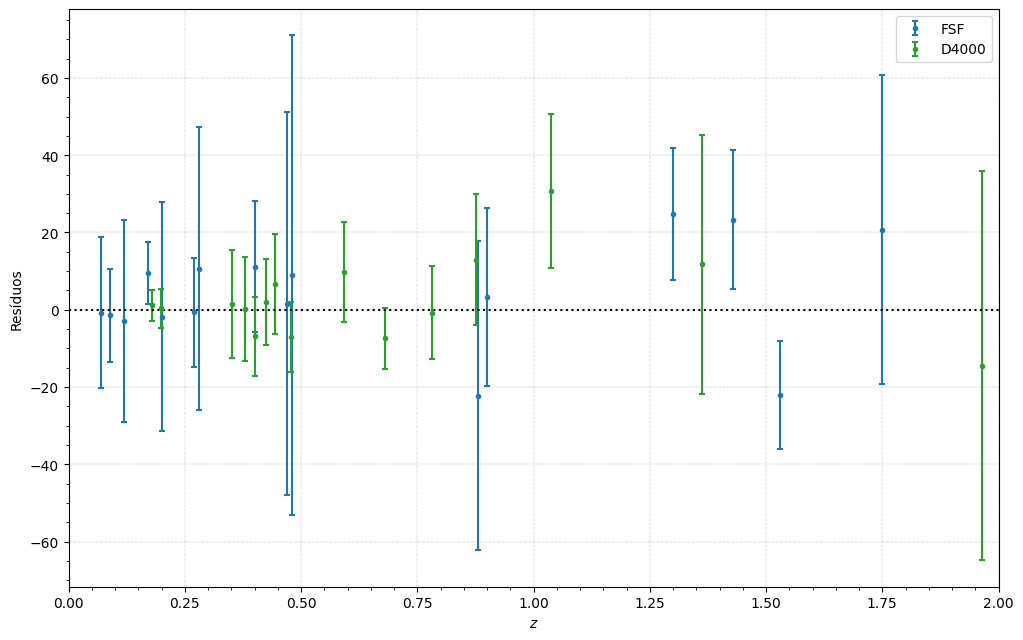

In [211]:
plt.errorbar(zszi_FSF, res_FSF, yerr=hziErr_FSF, fmt='.', color='C0', label='FSF', capsize=2, capthick=1.5)
#plt.errorbar(zszi_FSF, res_FSF, yerr=Corr_hziErr_FSF, fmt='.', color='C1', label='FSF Corrigido', capsize=2, capthick=1.5)
plt.errorbar(zszi_D4000, res_D4000, yerr=hziErr_D4000, fmt='.', color='C2', label='D4000', capsize=2, capthick=1.5)
#plt.errorbar(zszi_D4000, res_D4000, yerr=Corr_hziErr_D4000, fmt='.', color='C3', label='D4000 Corrigido', capsize=2, capthick=1.5)
plt.plot(z, np.zeros_like(z), linestyle=':', color='black')

fig1 = plt.gcf()
fig1.set_figwidth(12)
fig1.set_figheight(7.5)
plt.xlabel("$z$")
plt.ylabel("Resíduos")
plt.grid(linestyle='-.', linewidth='0.3')
plt.xlim(0,2)
plt.minorticks_on()

plt.legend()
plt.show()

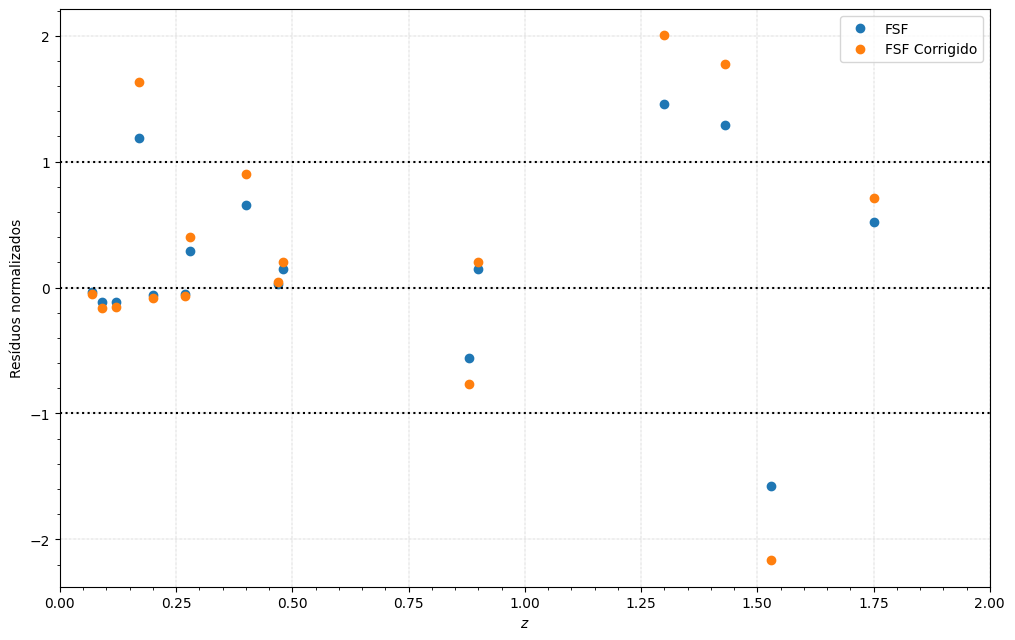

In [214]:
plt.plot(zszi_FSF, res_FSF/hziErr_FSF, 'o', color='C0', label='FSF')
plt.plot(zszi_FSF, res_FSF/Corr_hziErr_FSF, 'o', color='C1', label='FSF Corrigido')
#plt.plot(zszi_D4000, res_D4000/hziErr_D4000, 'o', color='C2', label='D4000')
#plt.plot(zszi_D4000, res_D4000/Corr_hziErr_D4000, 'o', color='C3', label='D4000 Corrigido')
plt.plot(z, np.ones_like(z), linestyle=':', color='black')
plt.plot(z, -np.ones_like(z), linestyle=':', color='black')
plt.plot(z, np.zeros_like(z), linestyle=':', color='black')

fig1 = plt.gcf()
fig1.set_figwidth(12)
fig1.set_figheight(7.5)
plt.xlabel('$z$')
plt.ylabel('Resíduos normalizados')
plt.grid(linestyle='-.', linewidth='0.3')
plt.xlim(0,2)
plt.minorticks_on()

plt.legend()
plt.show()

In [ ]:
print("----- Seus 'Pulls' Ordenados (Eixo Y) -----")
print(Corr_pull_ordenado_D4000[1])
print("\n")
print("----- Quantis Teóricos (Eixo X) -----")
print(Corr_pull_ordenado_D4000[0])

In [142]:
pull_FSF = res_FSF/hziErr_FSF
pull_D4000 = res_D4000/hziErr_D4000
Corr_pull_D4000 = res_D4000/Corr_hziErr_D4000
Corr_pull_FSF = res_FSF/Corr_hziErr_FSF

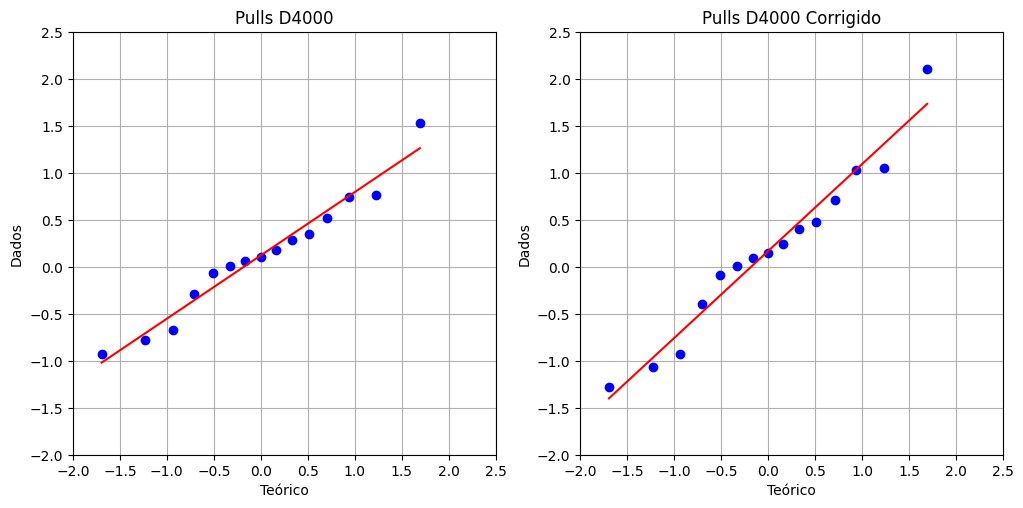

D4000                           D4000 corrigido
Observado | Teórico            Observado | Teórico
-0.929 | -1.694                  -1.276 | -1.694
-0.779 | -1.229                  -1.07 | -1.229
-0.674 | -0.936                  -0.926 | -0.936
-0.288 | -0.707                  -0.395 | -0.707
-0.066 | -0.511                  -0.09 | -0.511
0.009 | -0.332                  0.013 | -0.332
0.067 | -0.164                  0.093 | -0.164
0.107 | 0.0                  0.148 | 0.0
0.178 | 0.164                  0.244 | 0.164
0.291 | 0.332                  0.399 | 0.332
0.349 | 0.511                  0.48 | 0.511
0.515 | 0.707                  0.707 | 0.707
0.748 | 0.936                  1.027 | 0.936
0.765 | 1.229                  1.051 | 1.229
1.536 | 1.694                  2.11 | 1.694


Inclinação do best fit:
D4000: 0.674
D4000 corrigido: 0.926


In [202]:
fig1, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 6))

(pull_ordenado_D4000, pull_teorico_D4000) = stats.probplot(pull_D4000, dist="norm", plot=ax)
(Corr_pull_ordenado_D4000, Corr_pull_teorico_D4000) = stats.probplot(Corr_pull_D4000, dist="norm", plot=ax1)

ax.set_title("Pulls D4000")
ax.set_xlabel("Teórico")
ax.set_ylabel("Dados")
ax.set_xlim(-2,2.5)
ax.set_ylim(-2,2.5)
ax.set_aspect('equal', adjustable='box')
ax.grid()

ax1.set_title("Pulls D4000 Corrigido")
ax1.set_xlabel("Teórico")
ax1.set_ylabel("Dados")
ax1.set_xlim(-2,2.5)
ax1.set_ylim(-2,2.5)
ax1.set_aspect('equal', adjustable='box')
ax1.grid()
plt.show()

print("D4000                           D4000 corrigido")
print("Observado | Teórico            Observado | Teórico")
for i in range(0,len(pull_D4000)):
    print(f"{np.round(pull_ordenado_D4000[1][i], 3)} | {np.round(pull_ordenado_D4000[0][i], 3)}                  {np.round(Corr_pull_ordenado_D4000[1][i], 3)} | {np.round(Corr_pull_ordenado_D4000[0][i], 3)}")

print("\n\nInclinação do best fit:")
print(f"D4000: {np.round(pull_teorico_D4000[0],3)}\nD4000 corrigido: {np.round(Corr_pull_teorico_D4000[0],3)}")

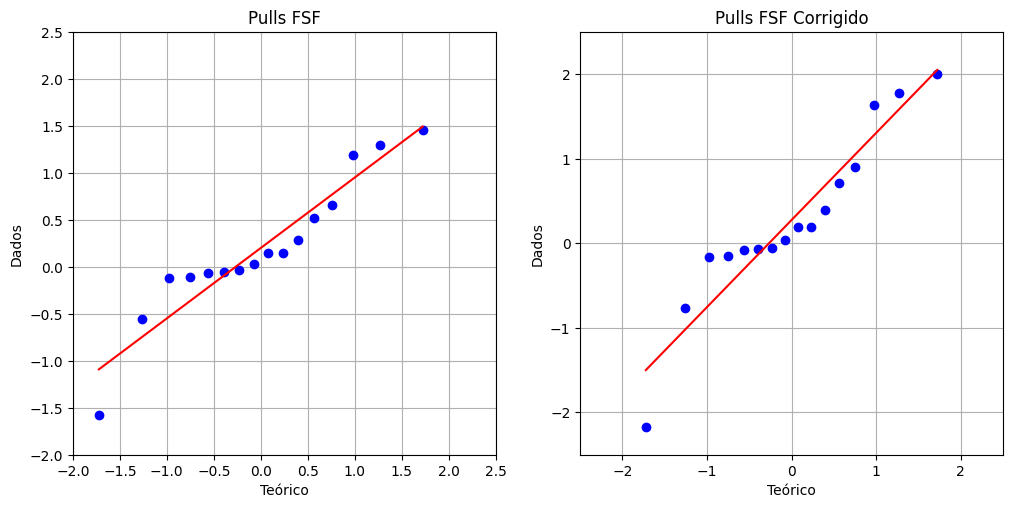

FSF                           FSF corrigido
Observado | Teórico            Observado | Teórico
-1.578 | -1.724                  -2.168 | -1.724
-0.558 | -1.266                  -0.766 | -1.266
-0.119 | -0.978                  -0.163 | -0.978
-0.112 | -0.755                  -0.154 | -0.755
-0.061 | -0.565                  -0.083 | -0.565
-0.05 | -0.393                  -0.069 | -0.393
-0.036 | -0.232                  -0.05 | -0.232
0.031 | -0.077                  0.042 | -0.077
0.145 | 0.077                  0.199 | 0.077
0.145 | 0.232                  0.199 | 0.232
0.291 | 0.393                  0.4 | 0.393
0.518 | 0.565                  0.712 | 0.565
0.655 | 0.755                  0.9 | 0.755
1.191 | 0.978                  1.636 | 0.978
1.292 | 1.266                  1.775 | 1.266
1.457 | 1.724                  2.002 | 1.724


Inclinação do best fit:
FSF: 0.75
FSF corrigido: 1.03


In [215]:
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))

(pull_ordenado_FSF, pull_teorico_FSF) = stats.probplot(pull_FSF, dist="norm", plot=ax3)
(Corr_pull_ordenado_FSF, Corr_pull_teorico_FSF) = stats.probplot(Corr_pull_FSF, dist="norm", plot=ax4)

ax3.set_title("Pulls FSF")
ax3.set_xlabel("Teórico")
ax3.set_ylabel("Dados")
ax3.set_xlim(-2,2.5)
ax3.set_ylim(-2,2.5)
ax3.set_aspect('equal', adjustable='box')
ax3.grid()

ax4.set_title("Pulls FSF Corrigido")
ax4.set_xlabel("Teórico")
ax4.set_ylabel("Dados")
ax4.set_xlim(-2.5,2.5)
ax4.set_ylim(-2.5,2.5)
ax4.set_aspect('equal', adjustable='box')
ax4.grid()
plt.show()

print("FSF                           FSF corrigido")
print("Observado | Teórico            Observado | Teórico")
for i in range(0,len(pull_FSF)):
    print(f"{np.round(pull_ordenado_FSF[1][i], 3)} | {np.round(pull_ordenado_FSF[0][i], 3)}                  {np.round(Corr_pull_ordenado_FSF[1][i], 3)} | {np.round(Corr_pull_ordenado_FSF[0][i], 3)}")

print("\n\nInclinação do best fit:")
print(f"FSF: {np.round(pull_teorico_FSF[0],3)}\nFSF corrigido: {np.round(Corr_pull_teorico_FSF[0],3)}")

# Análise dos erros com covariância

In [9]:
hzi_FSF = []
zszi_FSF = []
hziErr_FSF = []
hzi_D4000 = []
zszi_D4000 = []
hziErr_D4000 = []

for i in range(0, len(zszi)):
    if metodo[i] == "F":
        hzi_FSF.append(hzi[i])
        zszi_FSF.append(zszi[i])
        hziErr_FSF.append(hzi_err[i])
    elif metodo[i] == 'D':
        hzi_D4000.append(hzi[i])
        zszi_D4000.append(zszi[i])
        hziErr_D4000.append(hzi_err[i])

hzi_FSF = np.array(hzi_FSF)
zszi_FSF = np.array(zszi_FSF)
hziErr_FSF = np.array(hziErr_FSF)
#Corr_hziErr_FSF = 0.728*hziErr_FSF
hzi_D4000 = np.array(hzi_D4000)
zszi_D4000 = np.array(zszi_D4000)
hziErr_D4000 = np.array(hziErr_D4000)
#Corr_hziErr_D4000 = 0.728*hziErr_D4000

In [10]:
hz_lcdm_FSF = HzLCDM(zszi_FSF, planck_om, planck_h0)
hz_lcdm_D4000 = HzLCDM(zszi_D4000, planck_om, planck_h0)

res_FSF = hzi_FSF - hz_lcdm_FSF
res_D4000 = hzi_D4000 - hz_lcdm_D4000

In [72]:
ndata_FSF = len(hzi_FSF)
cov_mat_diag_FSF = np.zeros((ndata_FSF, ndata_FSF), dtype='float64')

for i in range(ndata_FSF):
    cov_mat_diag_FSF[i,i] = hziErr_FSF[i]**2

imf_intp = np.interp(zszi_FSF, zmod, imf)/100
spsooo_intp = np.interp(zszi_FSF, zmod, spsooo)/100

cov_mat_imf_FSF = np.zeros((ndata_FSF, ndata_FSF), dtype='float64')
cov_mat_spsooo_FSF = np.zeros((ndata_FSF, ndata_FSF), dtype='float64')

for i in range(ndata_FSF):
    for j in range(ndata_FSF):
        cov_mat_imf_FSF[i,j] = hzi_FSF[i] * imf_intp[i] * hzi_FSF[j] * imf_intp[j]
        cov_mat_spsooo_FSF[i,j] = hzi_FSF[i] * spsooo_intp[i] * hzi_FSF[j] * spsooo_intp[j]

cov_mat_FSF = cov_mat_imf_FSF + cov_mat_spsooo_FSF + cov_mat_diag_FSF
cov_mat_FSF_noimf = cov_mat_spsooo_FSF + cov_mat_diag_FSF
cov_mat_FSF_nosps = cov_mat_imf_FSF + cov_mat_diag_FSF
cov_mat_FSF_corr= (0.830**2)*cov_mat_FSF
cov_mat_FSF_stat = cov_mat_imf_FSF + cov_mat_spsooo_FSF + (0.728**2)*cov_mat_diag_FSF

inv_cov_FSF = linalg.inv(cov_mat_FSF)
inv_cov_FSF_diag = linalg.inv(cov_mat_diag_FSF)
inv_cov_FSF_noimf = linalg.inv(cov_mat_FSF_noimf)
inv_cov_FSF_nosps = linalg.inv(cov_mat_FSF_nosps)
inv_cov_FSF_corr = linalg.inv(cov_mat_FSF_corr)
inv_cov_FSF_stat = linalg.inv(cov_mat_FSF_stat)

In [73]:
ndata_D4000 = len(hzi_D4000)
cov_mat_diag_D4000 = np.zeros((ndata_D4000, ndata_D4000), dtype='float64')

for i in range(ndata_D4000):
    cov_mat_diag_D4000[i,i] = hziErr_D4000[i]**2

imf_intp = np.interp(zszi_D4000, zmod, imf)/100
spsooo_intp = np.interp(zszi_D4000, zmod, spsooo)/100

cov_mat_imf_D4000 = np.zeros((ndata_D4000, ndata_D4000), dtype='float64')
cov_mat_spsooo_D4000 = np.zeros((ndata_D4000, ndata_D4000), dtype='float64')

for i in range(ndata_D4000):
    for j in range(ndata_D4000):
        cov_mat_imf_D4000[i,j] = hzi_D4000[i] * imf_intp[i] * hzi_D4000[j] * imf_intp[j]
        cov_mat_spsooo_D4000[i,j] = hzi_D4000[i] * spsooo_intp[i] * hzi_D4000[j] * spsooo_intp[j]

cov_mat_D4000 = cov_mat_imf_D4000 + cov_mat_spsooo_D4000 + cov_mat_diag_D4000
cov_mat_D4000_noimf = cov_mat_spsooo_D4000 + cov_mat_diag_D4000
cov_mat_D4000_nosps = cov_mat_imf_D4000 + cov_mat_diag_D4000
cov_mat_D4000_corr = (0.752**2)*cov_mat_D4000
cov_mat_D4000_stat = cov_mat_imf_D4000 + cov_mat_spsooo_D4000 + (0.728**2)*cov_mat_diag_D4000

inv_cov_D4000 = linalg.inv(cov_mat_D4000)
inv_cov_D4000_diag = linalg.inv(cov_mat_diag_D4000)
inv_cov_D4000_noimf = linalg.inv(cov_mat_D4000_noimf)
inv_cov_D4000_nosps = linalg.inv(cov_mat_D4000_nosps)
inv_cov_D4000_corr = linalg.inv(cov_mat_D4000_corr)
inv_cov_D4000_stat = linalg.inv(cov_mat_D4000_stat)

In [74]:
inv_cholesky_cov_FSF = linalg.cholesky(inv_cov_FSF)
inv_cholesky_cov_FSF_diag = linalg.cholesky(inv_cov_FSF_diag)
inv_cholesky_cov_FSF_noimf = linalg.cholesky(inv_cov_FSF_noimf)
inv_cholesky_cov_FSF_nosps = linalg.cholesky(inv_cov_FSF_nosps)
inv_cholesky_cov_FSF_corr = linalg.cholesky(inv_cov_FSF_corr)
inv_cholesky_cov_FSF_stat = linalg.cholesky(inv_cov_FSF_stat)

inv_cholesky_cov_D4000 = linalg.cholesky(inv_cov_D4000)
inv_cholesky_cov_D4000_diag = linalg.cholesky(inv_cov_D4000_diag)
inv_cholesky_cov_D4000_noimf = linalg.cholesky(inv_cov_D4000_noimf)
inv_cholesky_cov_D4000_nosps = linalg.cholesky(inv_cov_D4000_nosps)
inv_cholesky_cov_D4000_corr = linalg.cholesky(inv_cov_D4000_corr)
inv_cholesky_cov_D4000_stat = linalg.cholesky(inv_cov_D4000_stat)

In [75]:
res_cholesky_FSF = np.dot(inv_cholesky_cov_FSF, res_FSF)
res_cholesky_FSF_diag = np.dot(inv_cholesky_cov_FSF_diag, res_FSF)
res_cholesky_FSF_noimf = np.dot(inv_cholesky_cov_FSF_noimf, res_FSF)
res_cholesky_FSF_nosps = np.dot(inv_cholesky_cov_FSF_nosps, res_FSF)
res_cholesky_FSF_corr = np.dot(inv_cholesky_cov_FSF_corr, res_FSF)
res_cholesky_FSF_stat = np.dot(inv_cholesky_cov_FSF_stat, res_FSF)

res_cholesky_D4000 = np.dot(inv_cholesky_cov_D4000, res_D4000)
res_cholesky_D4000_diag = np.dot(inv_cholesky_cov_D4000_diag, res_D4000)
res_cholesky_D4000_noimf = np.dot(inv_cholesky_cov_D4000_noimf, res_D4000)
res_cholesky_D4000_nosps = np.dot(inv_cholesky_cov_D4000_nosps, res_D4000)
res_cholesky_D4000_corr = np.dot(inv_cholesky_cov_D4000_corr, res_D4000)
res_cholesky_D4000_stat = np.dot(inv_cholesky_cov_D4000_stat, res_D4000)

In [140]:
print(f"Chi2 r_normalizado = {np.sum(res_cholesky_FSF**2)}")
print(f"Chi2 r_normalizado = {np.sum(np.dot(np.dot(res_FSF.T, inv_cov_FSF),res_FSF))}")

print(f"Chi2 r_normalizado = {np.sum(res_cholesky_D4000**2)}")
print(f"Chi2 r_normalizado = {np.sum(np.dot(np.dot(res_D4000.T, inv_cov_D4000),res_D4000))}")

Chi2 r_normalizado = 8.276968426402137
Chi2 r_normalizado = 8.276968426402139
Chi2 r_normalizado = 6.015628808808399
Chi2 r_normalizado = 6.0156288088083985


In [30]:
print(np.dot(np.dot(inv_cholesky_cov_FSF, cov_mat_FSF), inv_cholesky_cov_FSF.T))
print(f"\n{np.dot(np.dot(inv_cholesky_cov_D4000, cov_mat_D4000), inv_cholesky_cov_D4000.T)}")

[[ 1.00000000e+00  1.01970232e-18 -7.75785758e-19 -6.12197067e-19
  -4.16194248e-19  1.68099991e-18  1.20659276e-18 -2.31276738e-18
  -1.70386884e-18 -1.08489455e-18 -2.95031690e-20 -3.77271251e-19
   1.36931548e-19  4.81792252e-19 -1.69864491e-19 -1.52952956e-18]
 [ 3.44402105e-19  1.00000000e+00  2.67809172e-18 -9.10589048e-19
  -2.14360098e-19  1.11053135e-18  2.54420167e-19 -1.08082816e-18
   1.31783028e-18  3.65556642e-19  8.04848629e-20  2.17908313e-18
  -9.91959458e-20  1.06144521e-18  5.44356397e-19 -7.01910071e-19]
 [ 2.97143494e-18  1.59475028e-18  1.00000000e+00 -5.23877314e-19
   1.95743595e-20  8.87591246e-19 -7.63416202e-19  3.31888801e-19
   7.29542828e-19 -9.50983835e-19  1.96329274e-19  8.80546588e-19
  -1.76109523e-19  7.15796494e-19 -2.84738761e-19  4.72796709e-19]
 [-2.29825299e-18  3.14633461e-19 -3.31040229e-19  1.00000000e+00
  -4.97653064e-19 -7.59043562e-19 -4.38538331e-19  6.35216078e-19
  -7.19087478e-19  1.29824306e-18  2.46954786e-20  2.66267489e-19
  -2.44

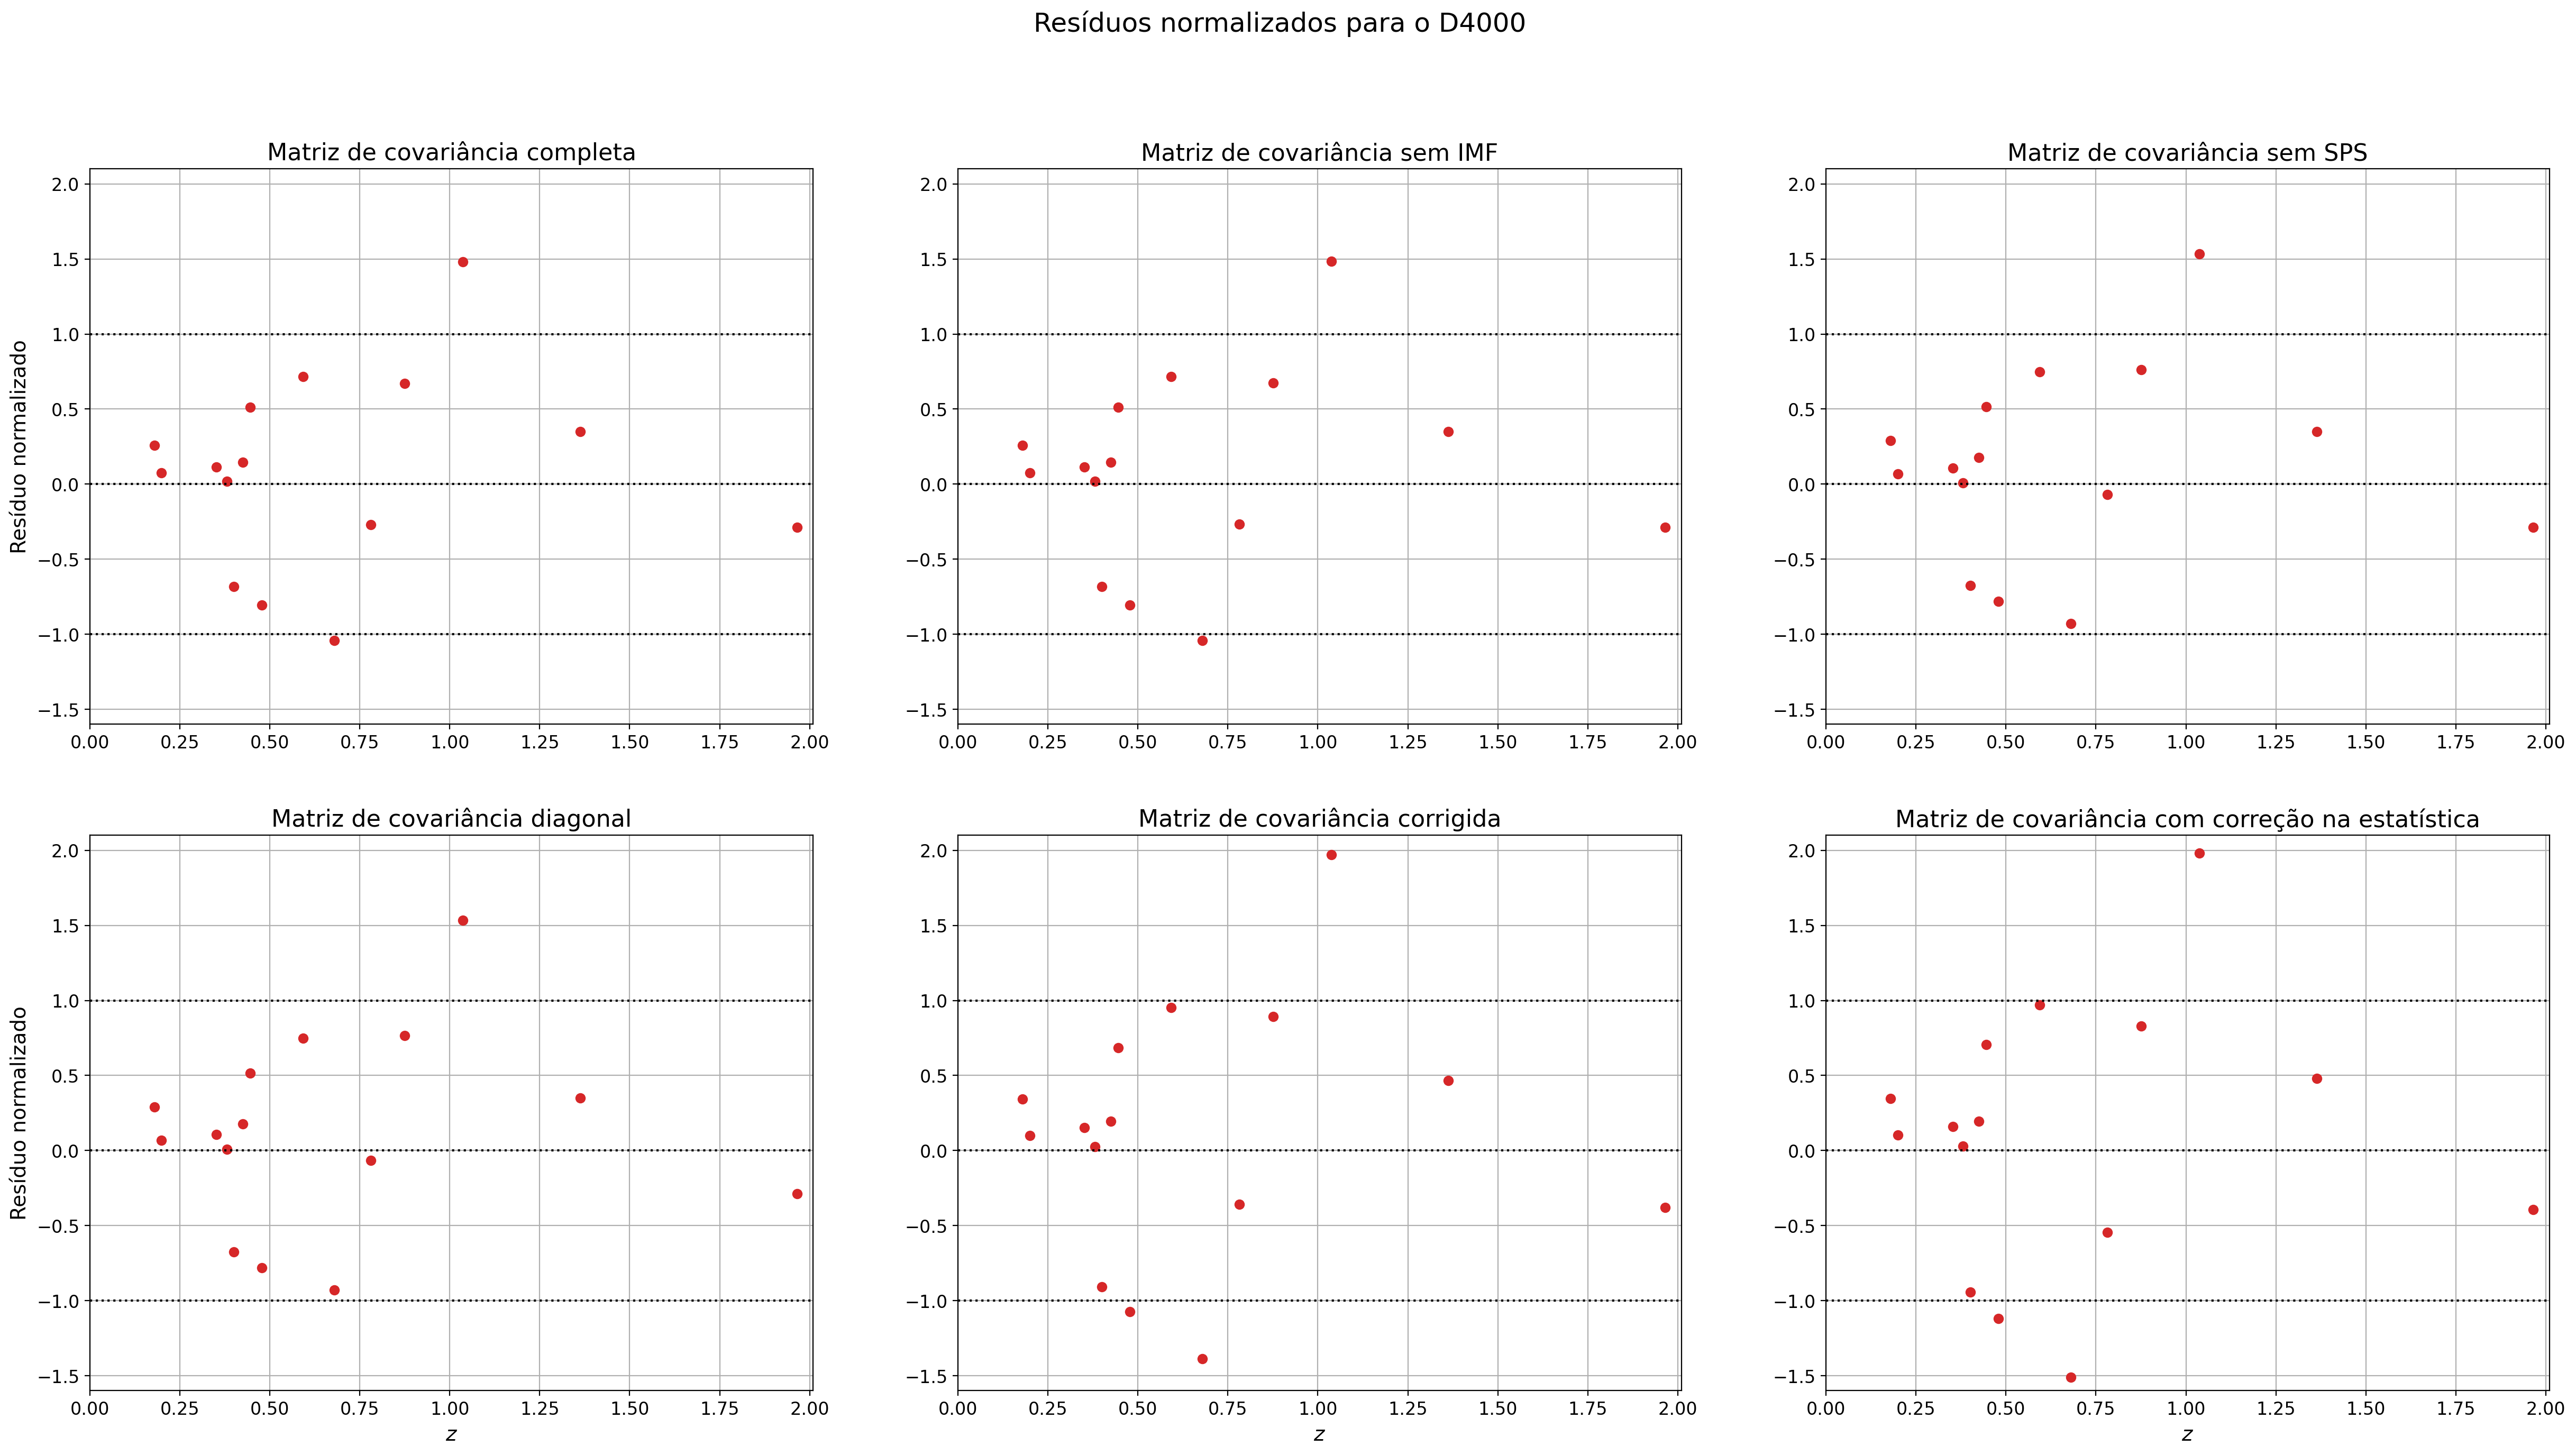

In [76]:
fig1, ((ax1, ax2, ax3), (ax5, ax4, ax6)) = plt.subplots(2, 3, figsize=(30, 15))

ax1.plot(zszi_D4000, res_cholesky_D4000, 'o', color='C3')
ax1.plot(z, np.ones_like(z), linestyle=':', color='black')
ax1.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax1.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax1.set_xlim(0,2.01)
ax1.set_ylim(-1.6,2.1)
ax1.set_title("Matriz de covariância completa")
ax1.set_ylabel("Resíduo normalizado")
ax1.grid()

ax2.plot(zszi_D4000, res_cholesky_D4000_noimf, 'o', color='C3')
ax2.plot(z, np.ones_like(z), linestyle=':', color='black')
ax2.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax2.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax2.set_xlim(0,2.01)
ax2.set_ylim(-1.6,2.1)
ax2.set_title("Matriz de covariância sem IMF")
ax2.grid()

ax3.plot(zszi_D4000, res_cholesky_D4000_nosps, 'o', color='C3')
ax3.plot(z, np.ones_like(z), linestyle=':', color='black')
ax3.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax3.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax3.set_xlim(0,2.01)
ax3.set_ylim(-1.6,2.1)
ax3.set_title("Matriz de covariância sem SPS")
ax3.grid()

ax4.plot(zszi_D4000, res_cholesky_D4000_corr, 'o', color='C3')
ax4.plot(z, np.ones_like(z), linestyle=':', color='black')
ax4.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax4.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax4.set_xlim(0,2.01)
ax4.set_ylim(-1.6,2.1)
ax4.set_title("Matriz de covariância corrigida")
ax4.set_xlabel("$z$")
ax4.grid()

ax5.plot(zszi_D4000, res_cholesky_D4000_diag, 'o', color='C3')
ax5.plot(z, np.ones_like(z), linestyle=':', color='black')
ax5.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax5.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax5.set_xlim(0,2.01)
ax5.set_ylim(-1.6,2.1)
ax5.set_title("Matriz de covariância diagonal")
ax5.set_ylabel("Resíduo normalizado")
ax5.set_xlabel("$z$")
ax5.grid()

ax6.plot(zszi_D4000, res_cholesky_D4000_stat, 'o', color='C3')
ax6.plot(z, np.ones_like(z), linestyle=':', color='black')
ax6.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax6.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax6.set_xlim(0,2.01)
ax6.set_ylim(-1.6,2.1)
ax6.set_title("Matriz de covariância com correção na estatística")
ax6.set_xlabel("$z$")
ax6.grid()

fig1.suptitle('Resíduos normalizados para o D4000')

plt.show()

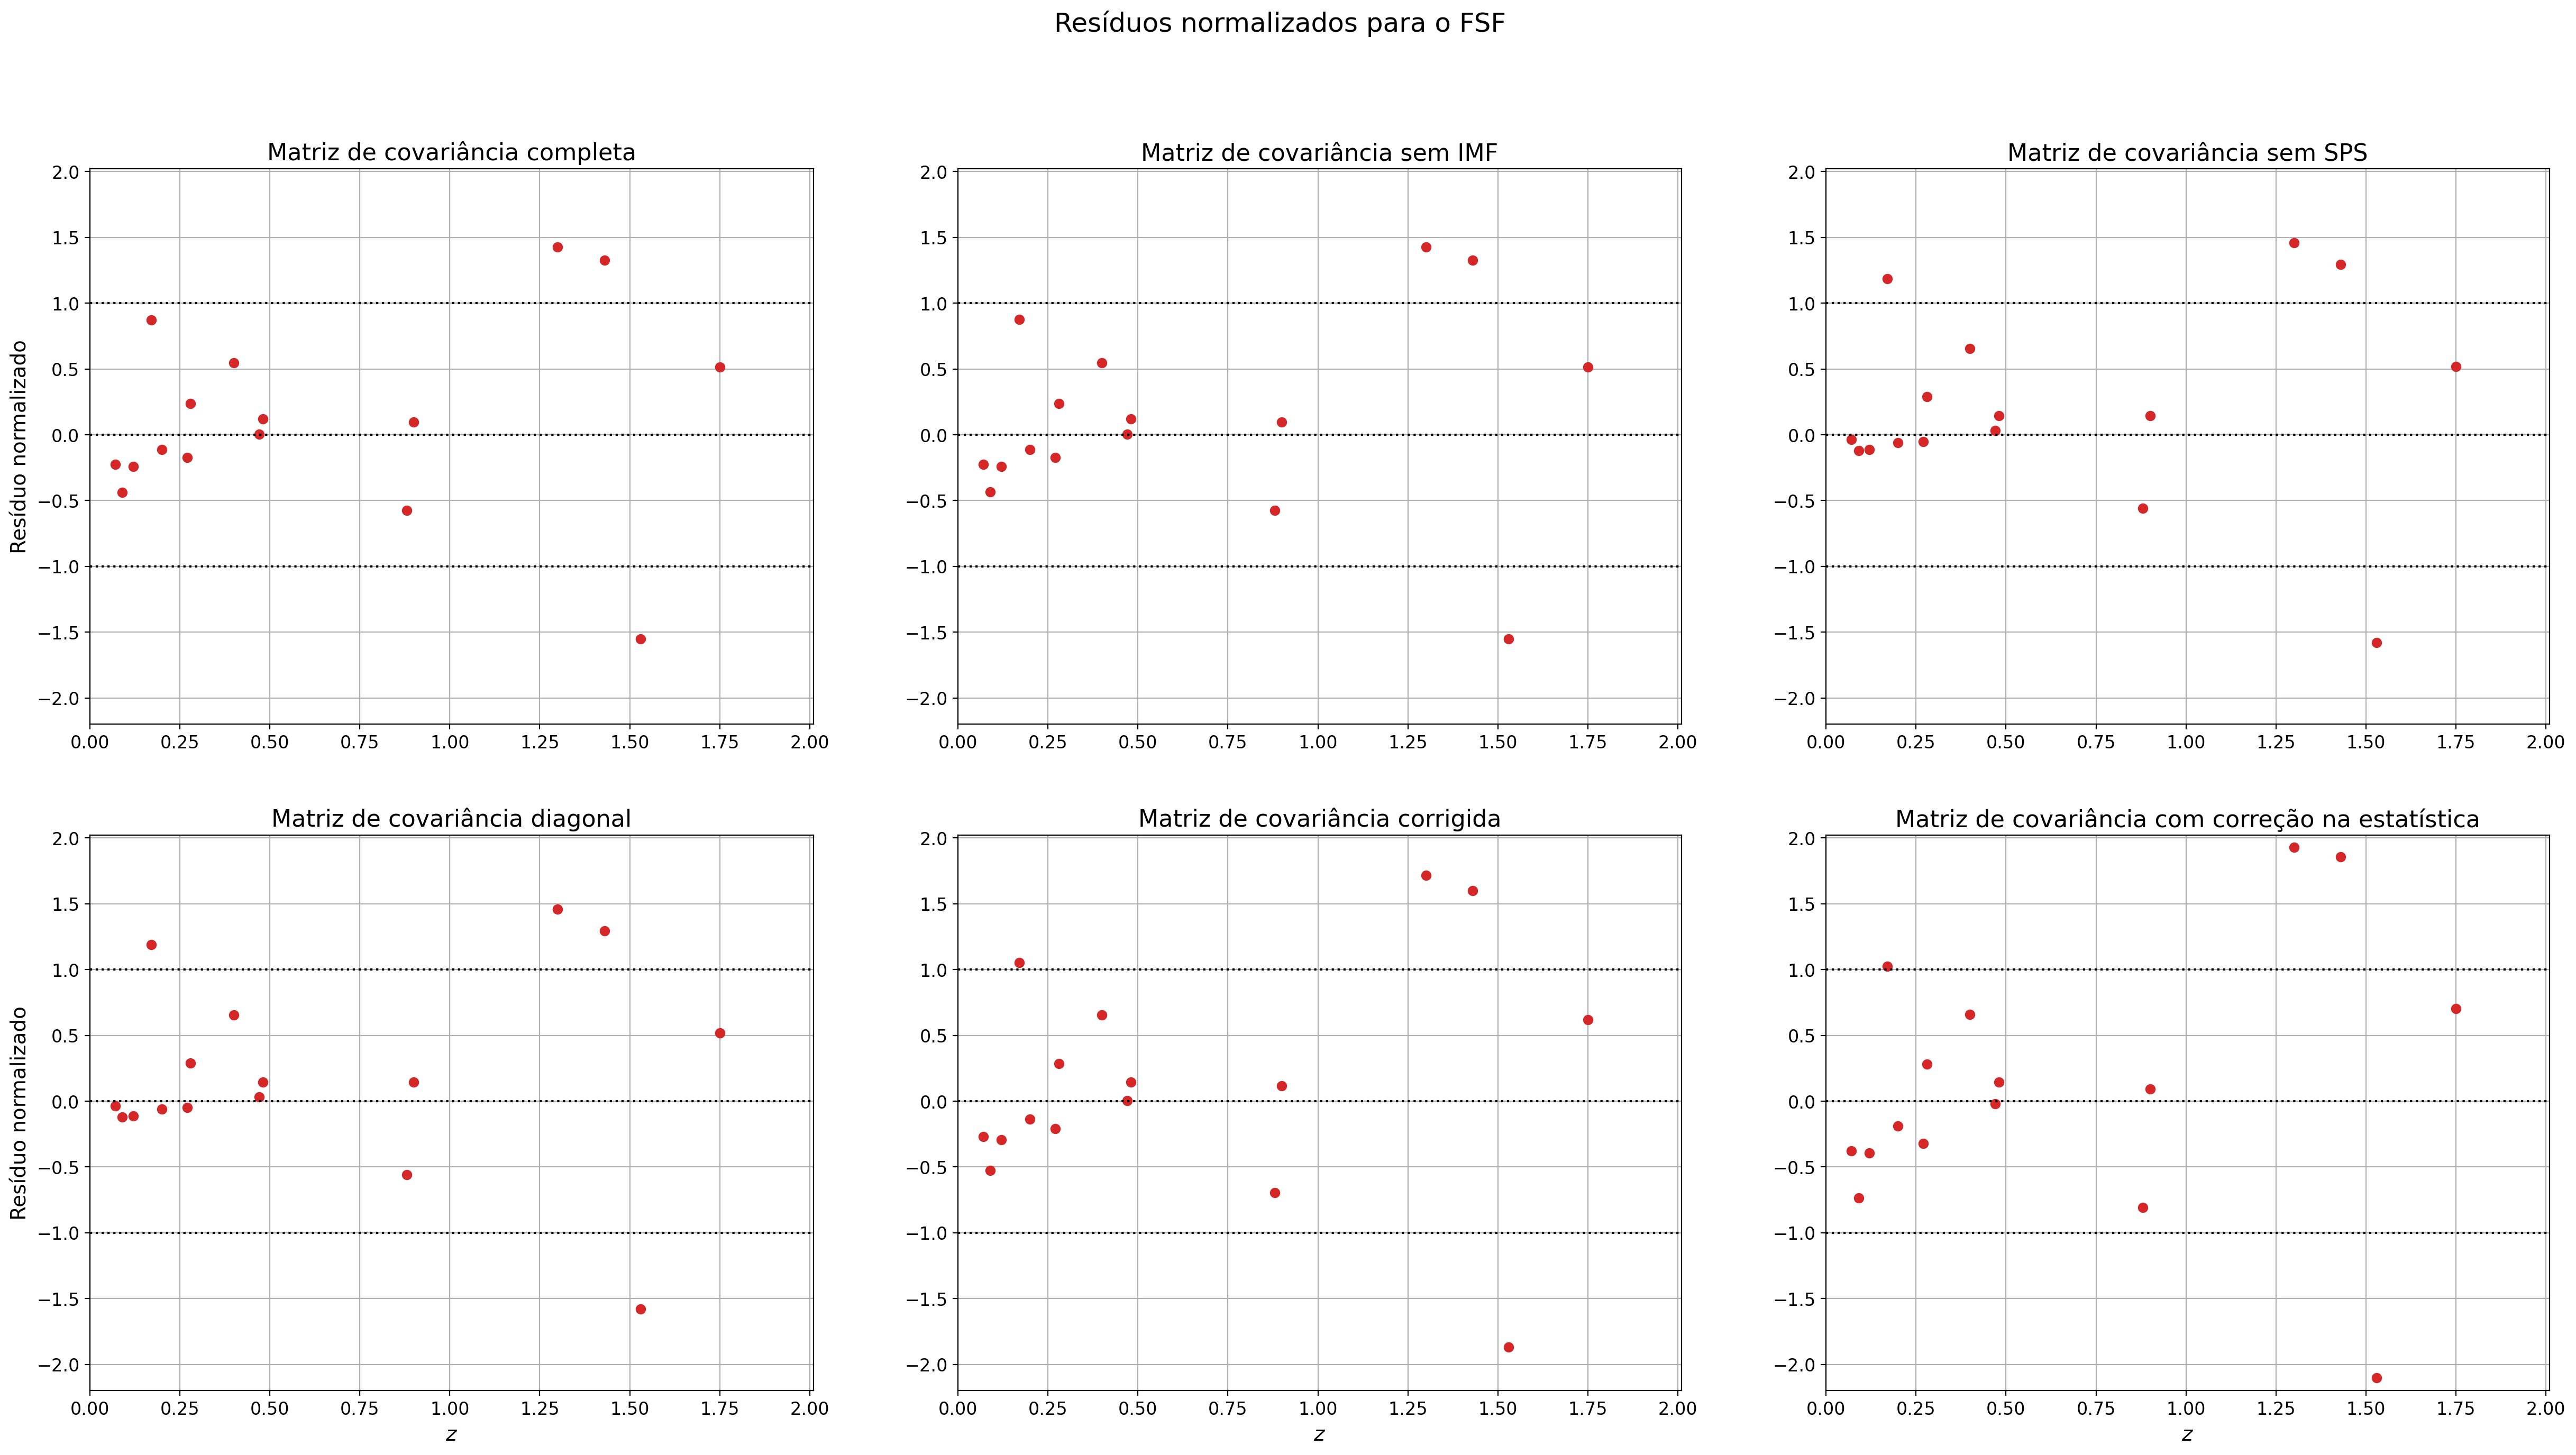

In [77]:
fig1, ((ax1, ax2, ax3), (ax5, ax4, ax6)) = plt.subplots(2, 3, figsize=(30, 15))

ax1.plot(zszi_FSF, res_cholesky_FSF, 'o', color='C3')
ax1.plot(z, np.ones_like(z), linestyle=':', color='black')
ax1.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax1.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax1.set_xlim(0,2.01)
ax1.set_ylim(-2.2,2.02)
ax1.set_title("Matriz de covariância completa")
ax1.set_ylabel("Resíduo normalizado")
ax1.grid()

ax2.plot(zszi_FSF, res_cholesky_FSF_noimf, 'o', color='C3')
ax2.plot(z, np.ones_like(z), linestyle=':', color='black')
ax2.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax2.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax2.set_xlim(0,2.01)
ax2.set_ylim(-2.2,2.02)
ax2.set_title("Matriz de covariância sem IMF")
ax2.grid()

ax3.plot(zszi_FSF, res_cholesky_FSF_nosps, 'o', color='C3')
ax3.plot(z, np.ones_like(z), linestyle=':', color='black')
ax3.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax3.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax3.set_xlim(0,2.01)
ax3.set_ylim(-2.2,2.02)
ax3.set_title("Matriz de covariância sem SPS")
ax3.grid()

ax4.plot(zszi_FSF, res_cholesky_FSF_corr, 'o', color='C3')
ax4.plot(z, np.ones_like(z), linestyle=':', color='black')
ax4.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax4.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax4.set_xlim(0,2.01)
ax4.set_ylim(-2.2,2.02)
ax4.set_title("Matriz de covariância corrigida")
ax4.set_xlabel("$z$")
ax4.grid()

ax5.plot(zszi_FSF, res_cholesky_FSF_diag, 'o', color='C3')
ax5.plot(z, np.ones_like(z), linestyle=':', color='black')
ax5.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax5.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax5.set_xlim(0,2.01)
ax5.set_ylim(-2.2,2.02)
ax5.set_title("Matriz de covariância diagonal")
ax5.set_ylabel("Resíduo normalizado")
ax5.set_xlabel("$z$")
ax5.grid()

ax6.plot(zszi_FSF, res_cholesky_FSF_stat, 'o', color='C3')
ax6.plot(z, np.ones_like(z), linestyle=':', color='black')
ax6.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax6.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax6.set_xlim(0,2.01)
ax6.set_ylim(-2.2,2.02)
ax6.set_title("Matriz de covariância com correção na estatística")
ax6.set_xlabel("$z$")
ax6.grid()

fig1.suptitle('Resíduos normalizados para o FSF')

plt.show()

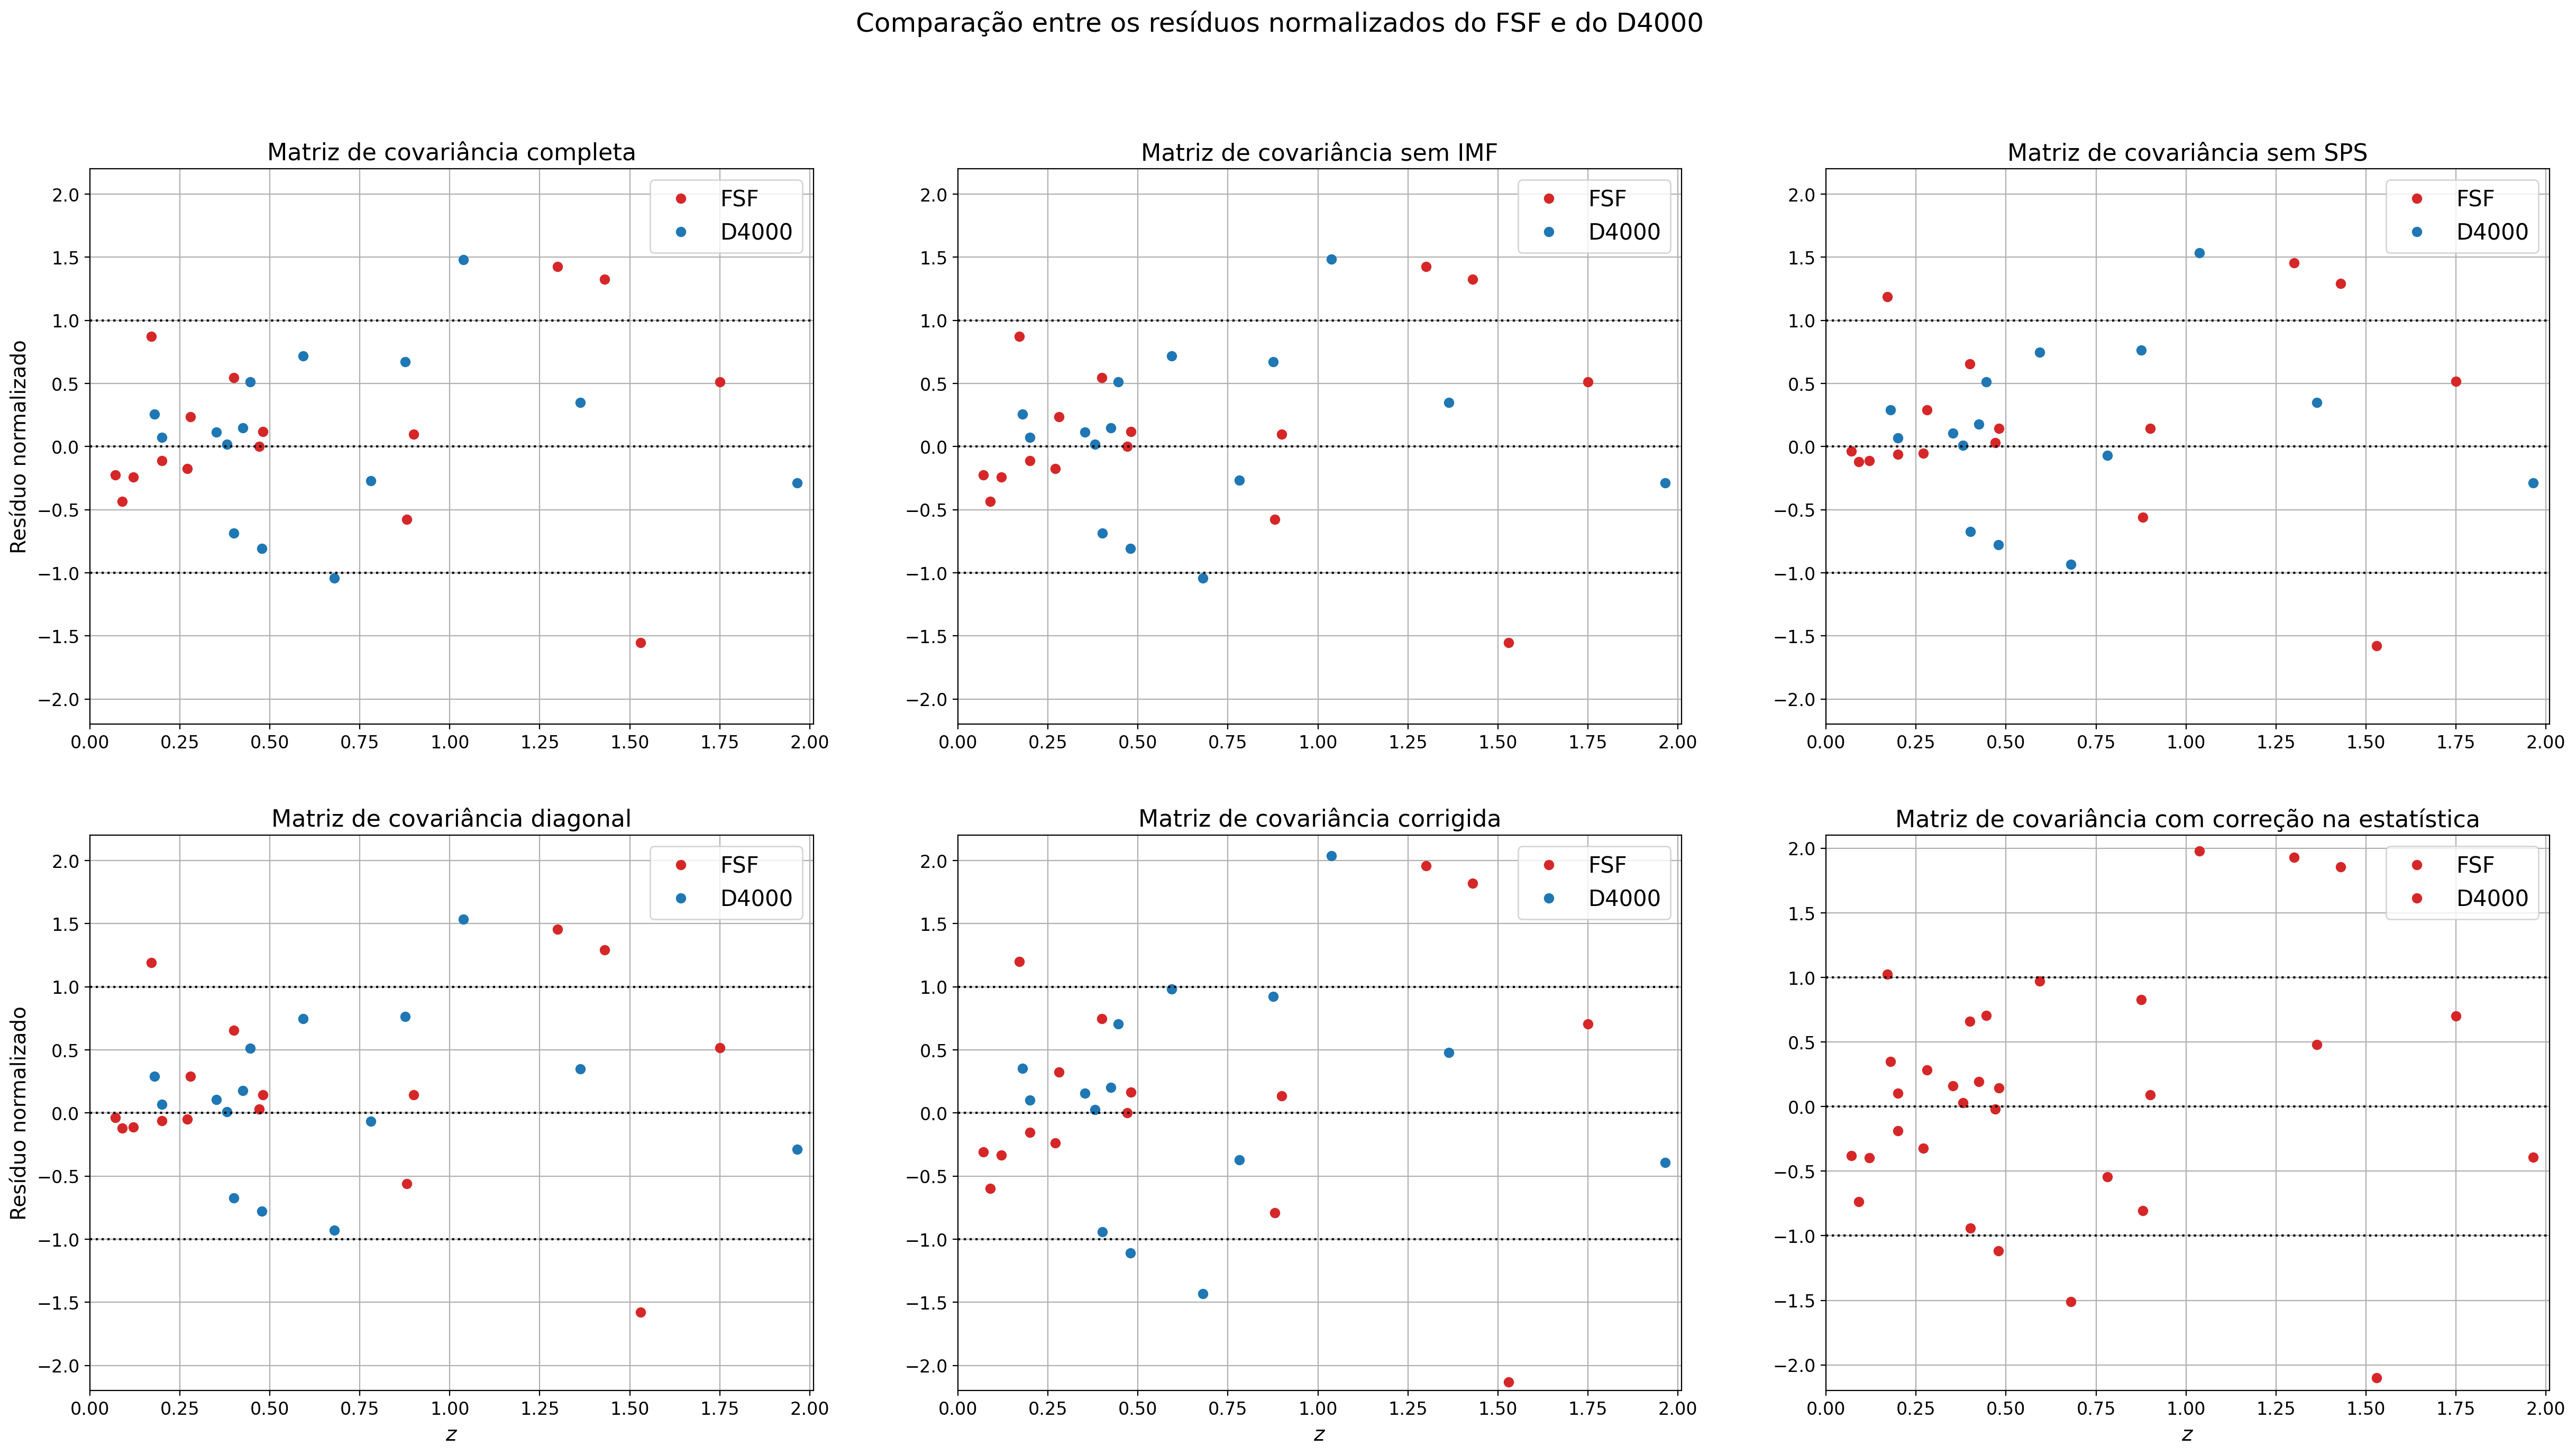

In [63]:
fig1, ((ax1, ax2, ax3), (ax5, ax4, ax6)) = plt.subplots(2, 3, figsize=(30, 15))

ax1.plot(zszi_FSF, res_cholesky_FSF, 'o', color='C3', label="FSF")
ax1.plot(zszi_D4000, res_cholesky_D4000, 'o', color='C10', label="D4000")
ax1.plot(z, np.ones_like(z), linestyle=':', color='black')
ax1.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax1.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax1.set_xlim(0,2.01)
ax1.set_ylim(-2.2,2.2)
ax1.set_title("Matriz de covariância completa")
ax1.set_ylabel("Resíduo normalizado")
ax1.grid()
ax1.legend(fontsize=15)

ax2.plot(zszi_FSF, res_cholesky_FSF_noimf, 'o', color='C3', label="FSF")
ax2.plot(zszi_D4000, res_cholesky_D4000_noimf, 'o', color='C10', label="D4000")
ax2.plot(z, np.ones_like(z), linestyle=':', color='black')
ax2.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax2.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax2.set_xlim(0,2.01)
ax2.set_ylim(-2.2,2.2)
ax2.set_title("Matriz de covariância sem IMF")
ax2.grid()
ax2.legend(fontsize=15)

ax3.plot(zszi_FSF, res_cholesky_FSF_nosps, 'o', color='C3', label="FSF")
ax3.plot(zszi_D4000, res_cholesky_D4000_nosps, 'o', color='C10', label="D4000")
ax3.plot(z, np.ones_like(z), linestyle=':', color='black')
ax3.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax3.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax3.set_xlim(0,2.01)
ax3.set_ylim(-2.2,2.2)
ax3.set_title("Matriz de covariância sem SPS")
ax3.grid()
ax3.legend(fontsize=15)

ax4.plot(zszi_FSF, res_cholesky_FSF_corr, 'o', color='C3', label="FSF")
ax4.plot(zszi_D4000, res_cholesky_D4000_corr, 'o', color='C10', label="D4000")
ax4.plot(z, np.ones_like(z), linestyle=':', color='black')
ax4.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax4.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax4.set_xlim(0,2.01)
ax4.set_ylim(-2.2,2.2)
ax4.set_title("Matriz de covariância corrigida")
ax4.set_xlabel("$z$")
ax4.grid()
ax4.legend(fontsize=15)

ax5.plot(zszi_FSF, res_cholesky_FSF_diag, 'o', color='C3', label="FSF")
ax5.plot(zszi_D4000, res_cholesky_D4000_diag, 'o', color='C10', label="D4000")
ax5.plot(z, np.ones_like(z), linestyle=':', color='black')
ax5.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax5.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax5.set_xlim(0,2.01)
ax5.set_ylim(-2.2,2.2)
ax5.set_title("Matriz de covariância diagonal")
ax5.set_ylabel("Resíduo normalizado")
ax5.set_xlabel("$z$")
ax5.grid()
ax5.legend(fontsize=15)

ax6.plot(zszi_FSF, res_cholesky_FSF_stat, 'o', color='C3', label="FSF")
ax6.plot(zszi_D4000, res_cholesky_D4000_stat, 'o', color='C3', label="D4000")
ax6.plot(z, np.ones_like(z), linestyle=':', color='black')
ax6.plot(z, -np.ones_like(z), linestyle=':', color='black')
ax6.plot(z, np.zeros_like(z), linestyle=':', color='black')
ax6.set_xlim(0,2.01)
ax6.set_ylim(-2.2,2.1)
ax6.set_title("Matriz de covariância com correção na estatística")
ax6.set_xlabel("$z$")
ax6.grid()
ax6.legend(fontsize=15)

fig1.suptitle('Comparação entre os resíduos normalizados do FSF e do D4000')

plt.show()

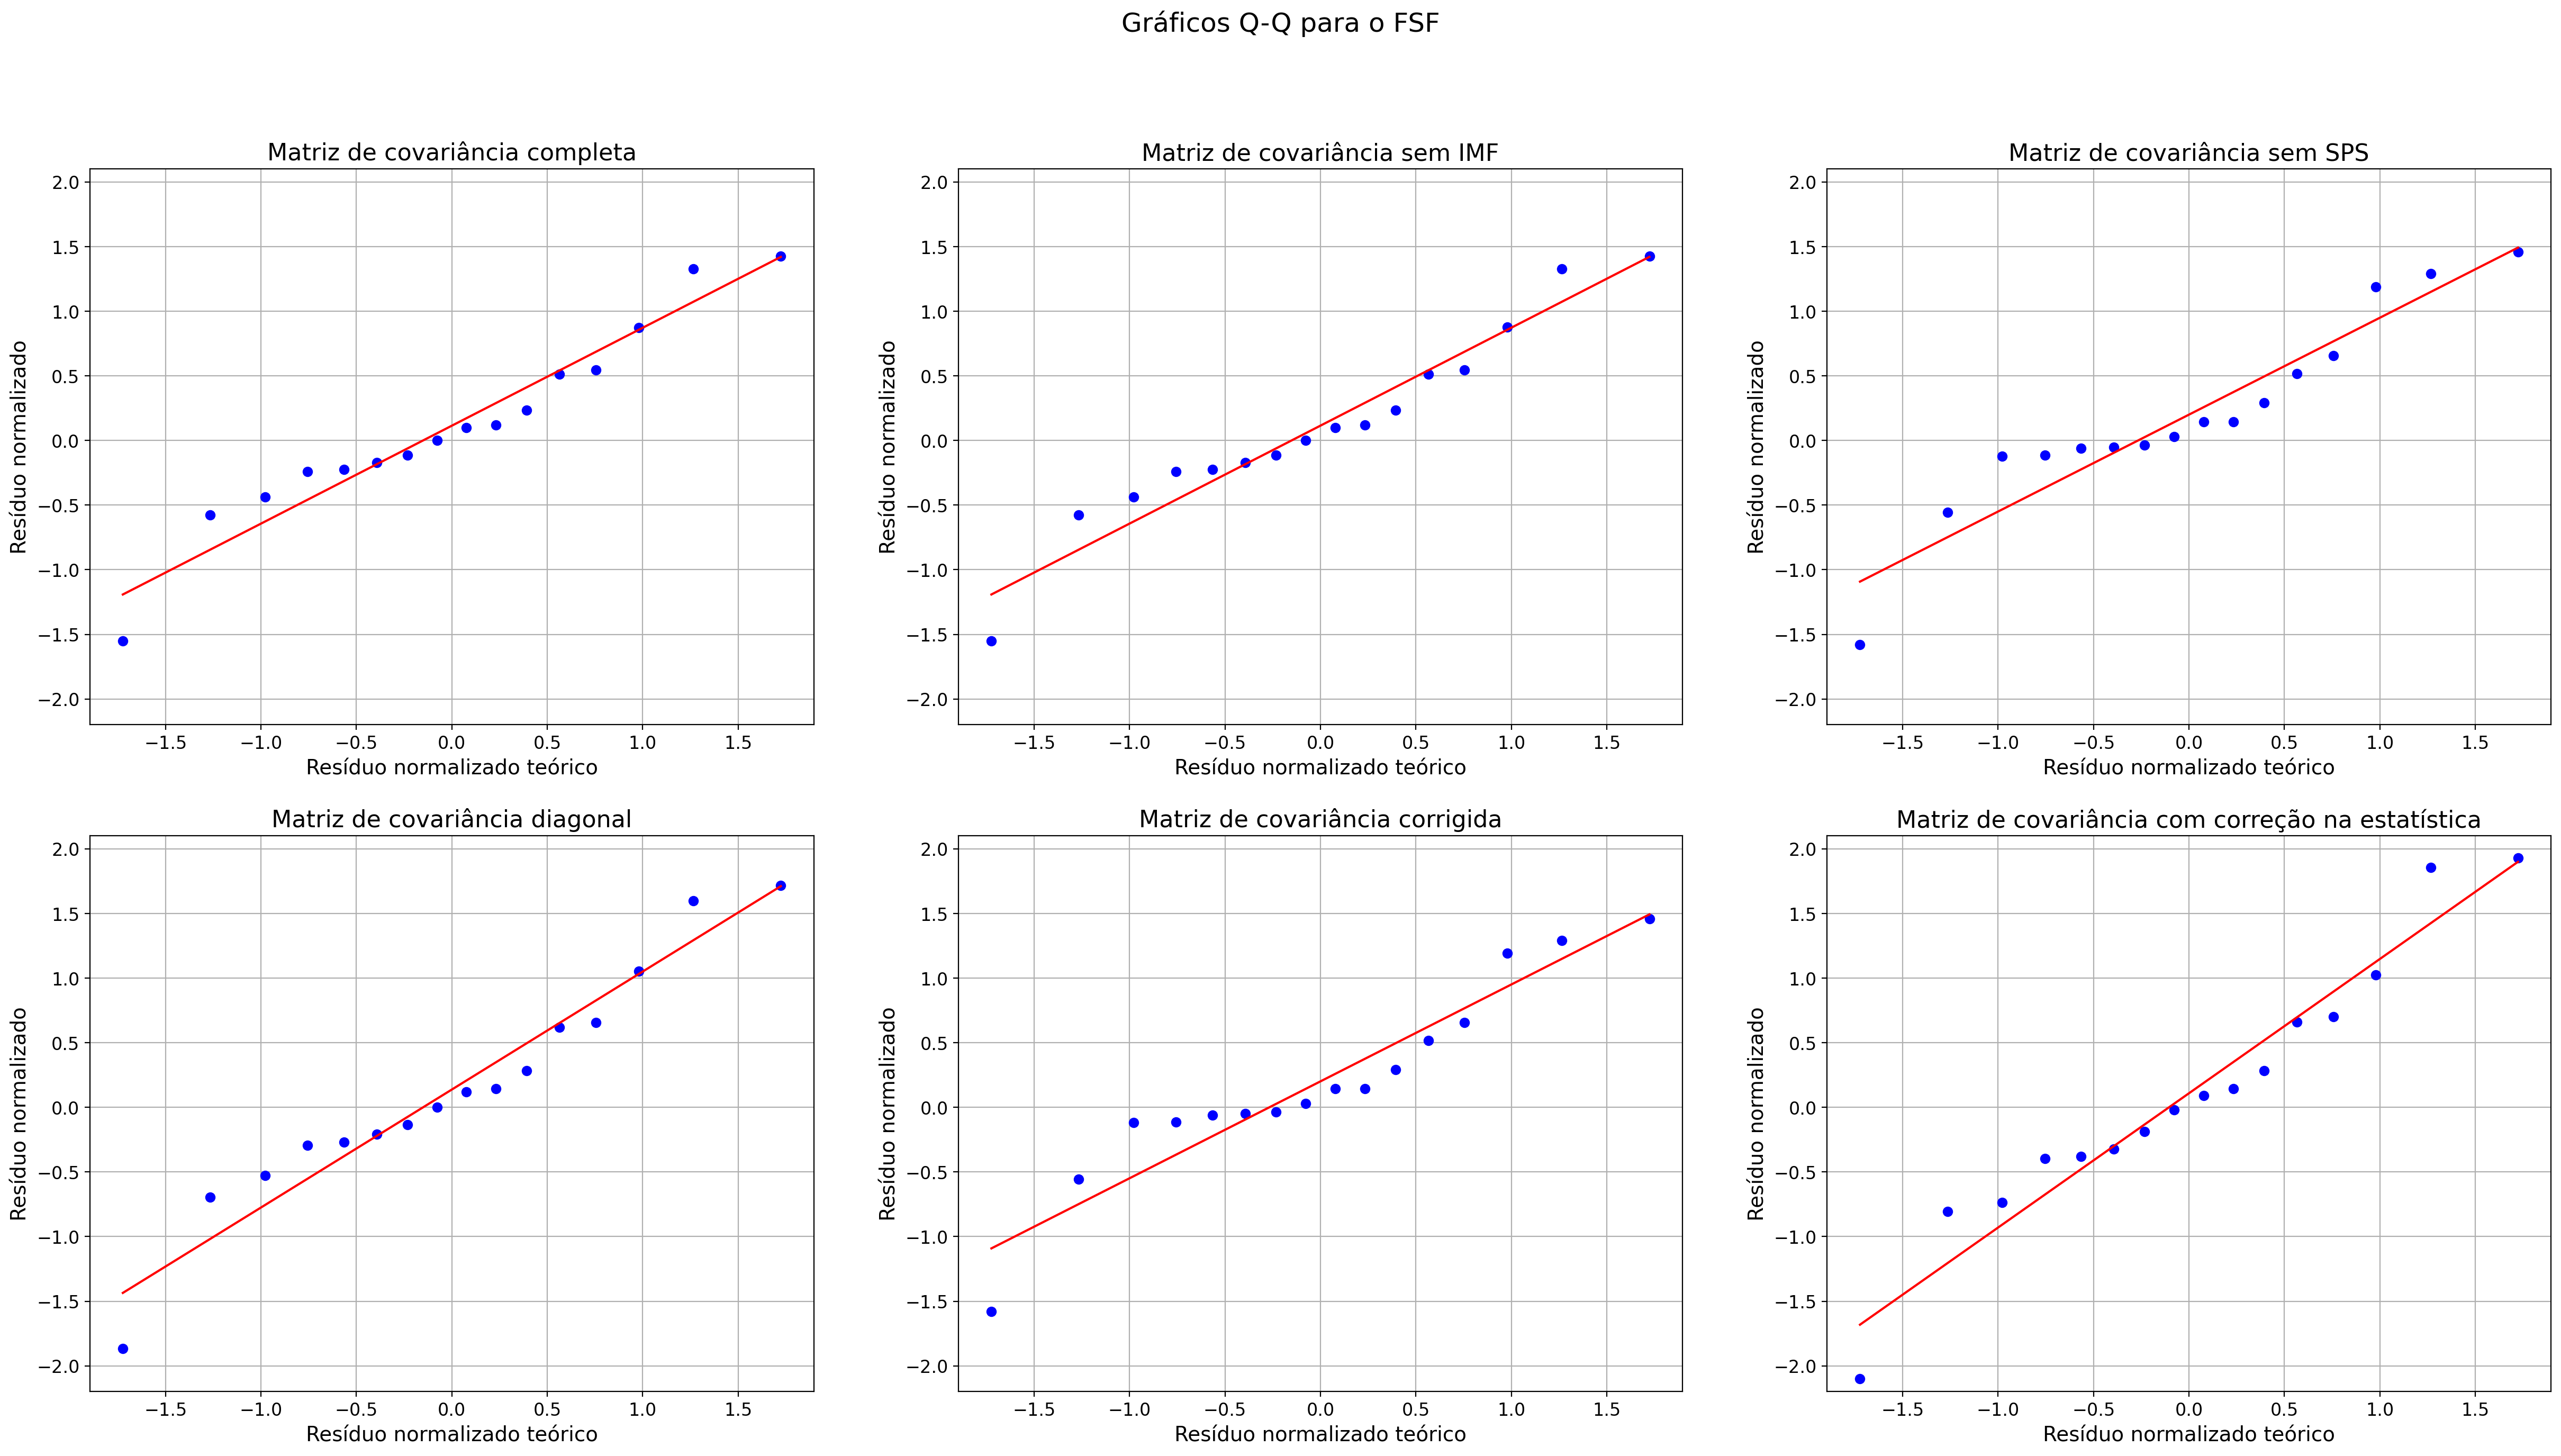

Inclinações:
Matriz de covariância completa: 0.7578195149190895
Matriz de covariância sem IMF: 0.7578895533329443
Matriz de covariância sem SPS: 0.7497264275141043
Matriz de covariância diagonal: 0.74971357663775
Matriz de covariância corrigida: 0.9130355601434815
Matriz de covariância com correção na estatística: 1.039014905924781


In [78]:
fig1, ((ax1, ax2, ax3), (ax5, ax4, ax6)) = plt.subplots(2, 3, figsize=(30, 15))

((res_teo_FSF, res_ord_FSF), ang_FSF) = stats.probplot(res_cholesky_FSF, dist="norm", plot=ax1)
((res_teo_FSF_noimf, res_ord_FSF_noimf), ang_FSF_noimf) = stats.probplot(res_cholesky_FSF_noimf, dist="norm", plot=ax2)
((res_teo_FSF_nosps, res_ord_FSF_nosps), ang_FSF_nosps) = stats.probplot(res_cholesky_FSF_nosps, dist="norm", plot=ax3)
((res_teo_FSF_diag, res_ord_FSF_diag), ang_FSF_diag) = stats.probplot(res_cholesky_FSF_diag, dist="norm", plot=ax4)
((res_teo_FSF_corr, res_ord_FSF_corr), ang_FSF_corr) = stats.probplot(res_cholesky_FSF_corr, dist="norm", plot=ax5)
((res_teo_FSF_corr, res_ord_FSF_stat), ang_FSF_stat) = stats.probplot(res_cholesky_FSF_stat, dist="norm", plot=ax6)

#ax1.set_xlim(0,2.01)
ax1.set_ylim(-2.2,2.1)
ax1.set_title("Matriz de covariância completa")
ax1.set_ylabel("Resíduo normalizado")
ax1.set_ylabel("Resíduo normalizado")
ax1.set_xlabel("Resíduo normalizado teórico")
ax1.grid()

#ax2.set_xlim(0,2.01)
ax2.set_ylim(-2.2,2.1)
ax2.set_title("Matriz de covariância sem IMF")
ax2.set_ylabel("Resíduo normalizado")
ax2.set_xlabel("Resíduo normalizado teórico")
ax2.grid()

#ax3.set_xlim(0,2.01)
ax3.set_ylim(-2.2,2.1)
ax3.set_title("Matriz de covariância sem SPS")
ax3.set_ylabel("Resíduo normalizado")
ax3.set_xlabel("Resíduo normalizado teórico")
ax3.grid()

#ax4.set_xlim(0,2.01)
ax4.set_ylim(-2.2,2.1)
ax4.set_title("Matriz de covariância corrigida")
ax4.set_ylabel("Resíduo normalizado")
ax4.set_xlabel("Resíduo normalizado teórico")
ax4.grid()

#ax5.set_xlim(0,2.01)
ax5.set_ylim(-2.2,2.1)
ax5.set_title("Matriz de covariância diagonal")
ax5.set_ylabel("Resíduo normalizado")
ax5.set_xlabel("Resíduo normalizado teórico")
ax5.grid()

ax6.set_ylim(-2.2,2.1)
ax6.set_title("Matriz de covariância com correção na estatística")
ax6.set_ylabel("Resíduo normalizado")
ax6.set_xlabel("Resíduo normalizado teórico")
ax6.grid()

fig1.suptitle('Gráficos Q-Q para o FSF')

plt.show()

print("Inclinações:")
print(f"Matriz de covariância completa: {ang_FSF[0]}")
print(f"Matriz de covariância sem IMF: {ang_FSF_noimf[0]}")
print(f"Matriz de covariância sem SPS: {ang_FSF_nosps[0]}")
print(f"Matriz de covariância diagonal: {ang_FSF_diag[0]}")
print(f"Matriz de covariância corrigida: {ang_FSF_corr[0]}")
print(f"Matriz de covariância com correção na estatística: {ang_FSF_stat[0]}")

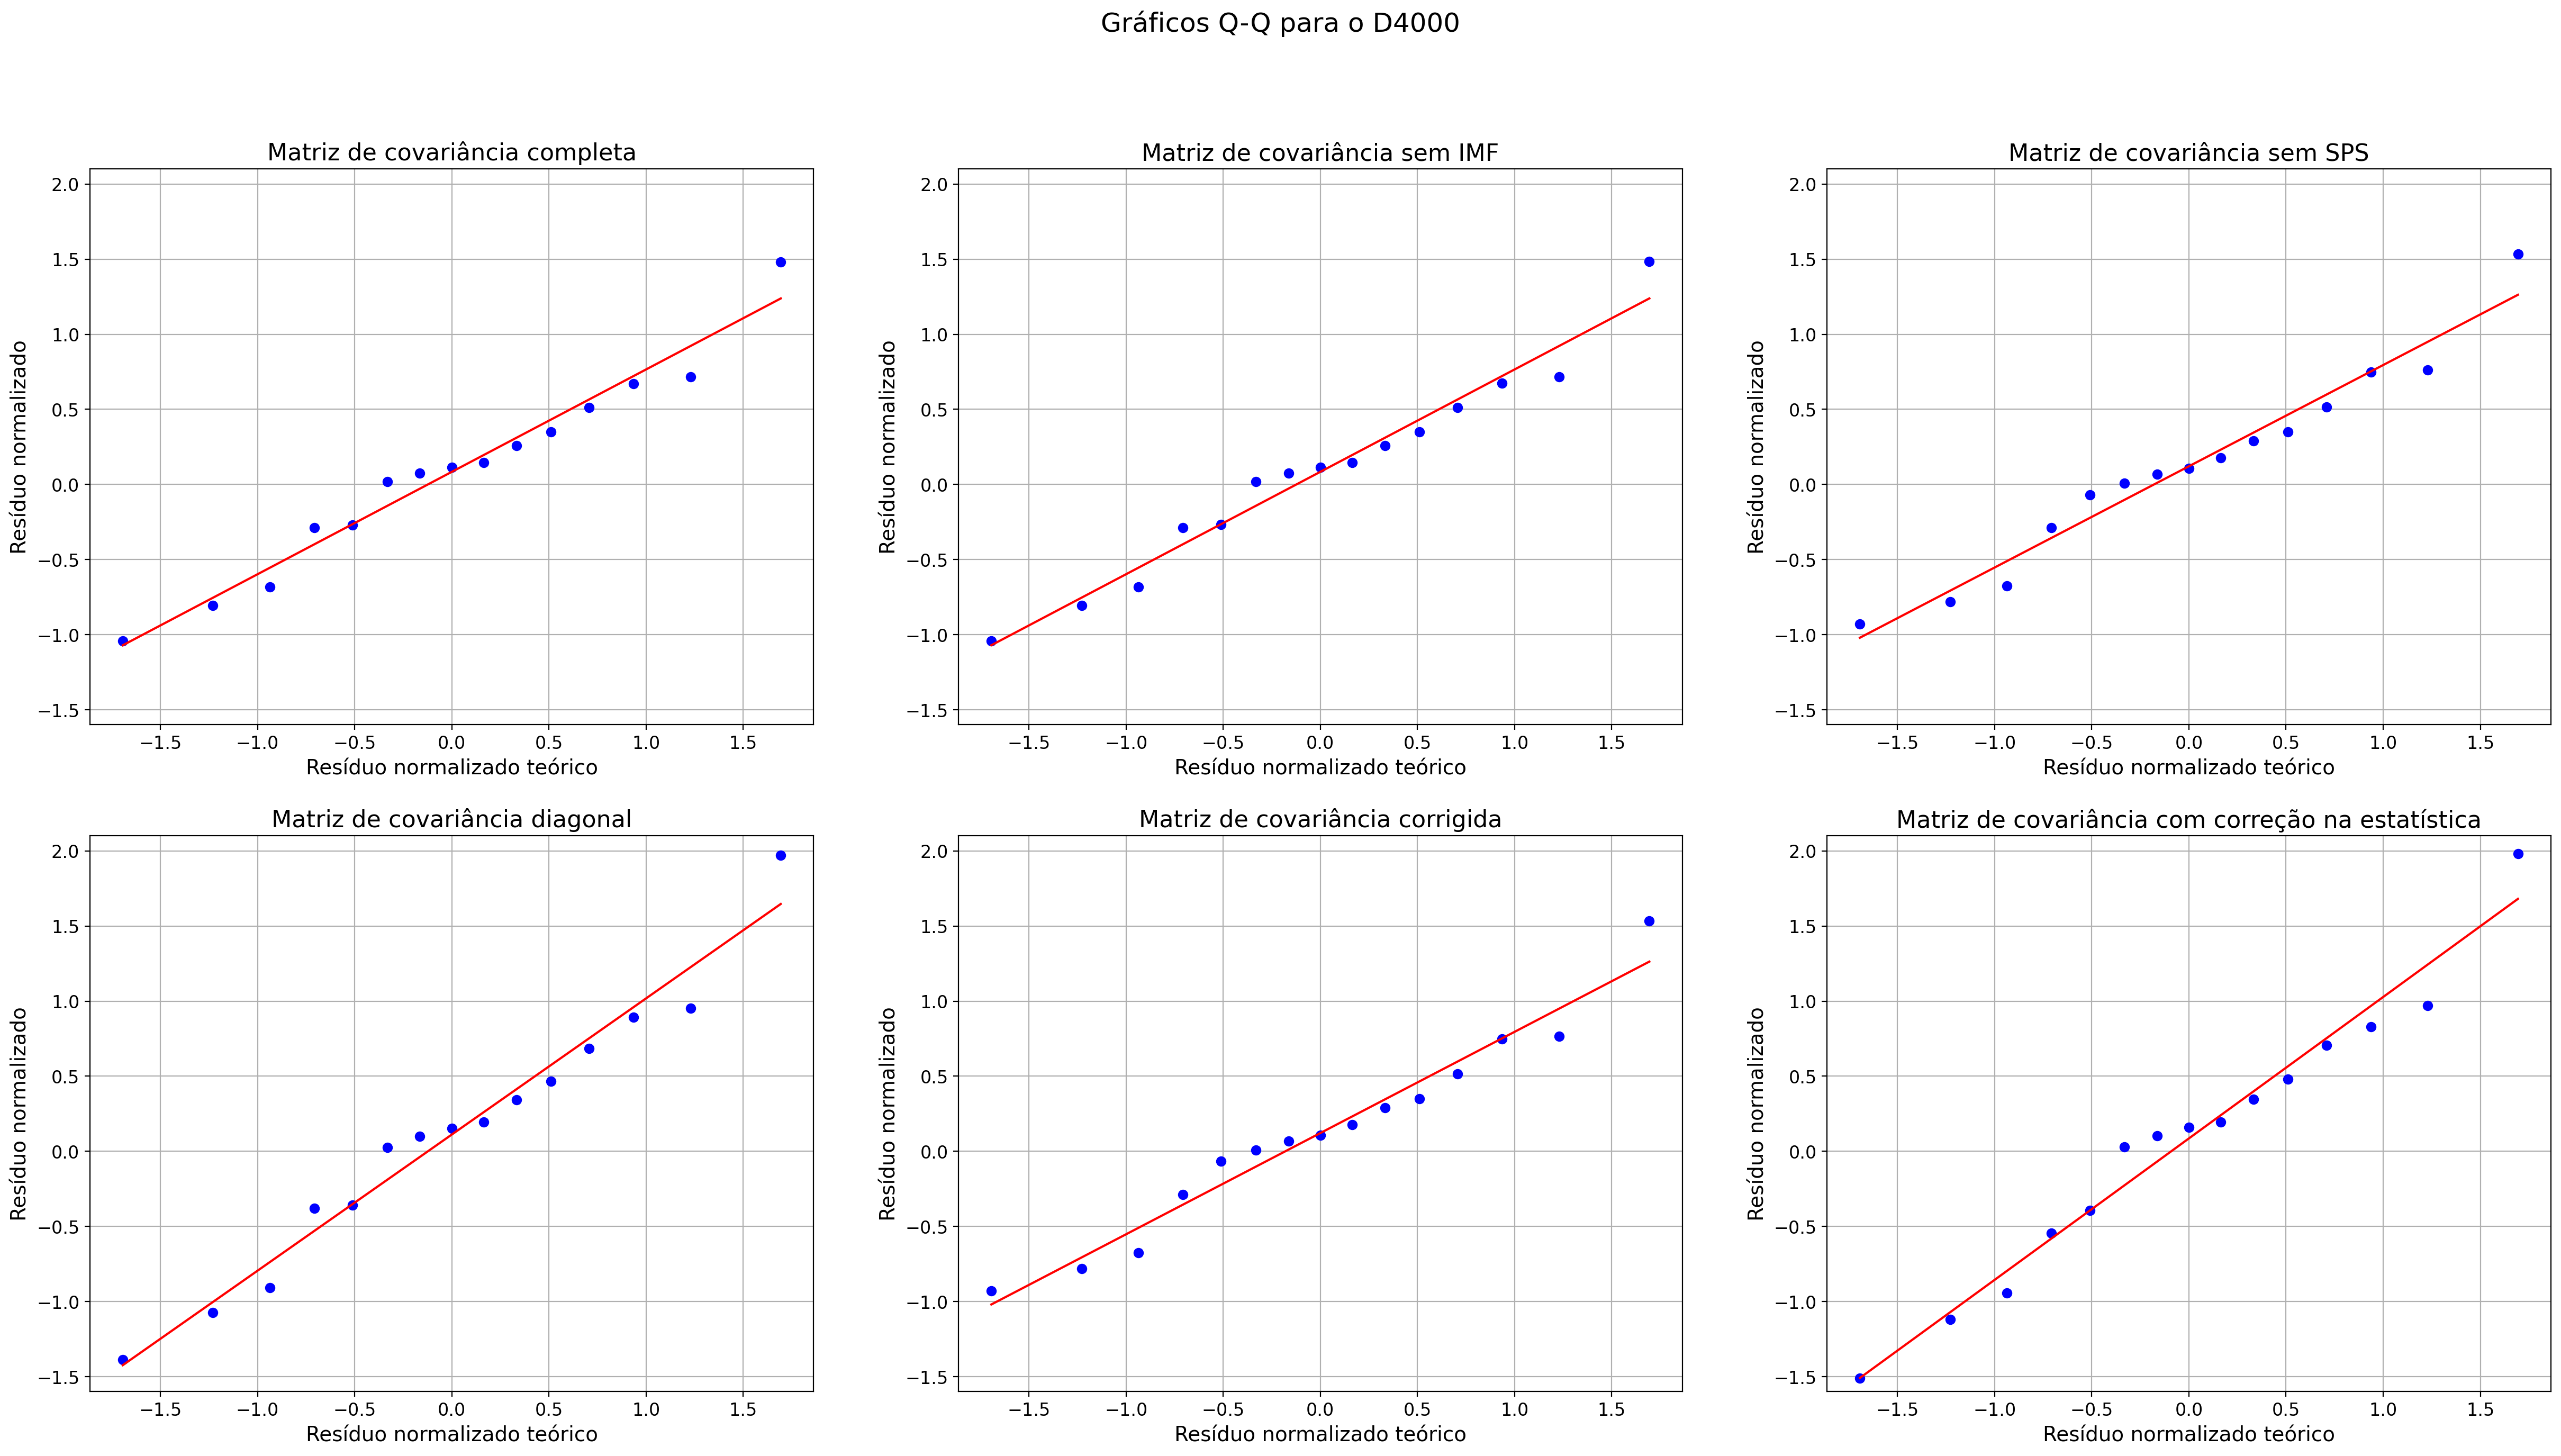

Inclinações:
Matriz de covariância completa: 0.6816888013692396
Matriz de covariância sem IMF: 0.6816521849713125
Matriz de covariância sem SPS: 0.6739762931434503
Matriz de covariância diagonal: 0.6738881225935249
Matriz de covariância corrigida: 0.9065010656505846
Matriz de covariância com correção na estatística: 0.9415590650796758


In [79]:
fig1, ((ax1, ax2, ax3), (ax5, ax4, ax6)) = plt.subplots(2, 3, figsize=(30, 15))

((res_teo_D4000, res_ord_D4000), ang_D4000) = stats.probplot(res_cholesky_D4000, dist="norm", plot=ax1)
((res_teo_D4000_noimf, res_ord_D4000_noimf), ang_D4000_noimf) = stats.probplot(res_cholesky_D4000_noimf, dist="norm", plot=ax2)
((res_teo_D4000_nosps, res_ord_D4000_nosps), ang_D4000_nosps) = stats.probplot(res_cholesky_D4000_nosps, dist="norm", plot=ax3)
((res_teo_D4000_diag, res_ord_D4000_diag), ang_D4000_diag) = stats.probplot(res_cholesky_D4000_diag, dist="norm", plot=ax4)
((res_teo_D4000_corr, res_ord_D4000_corr), ang_D4000_corr) = stats.probplot(res_cholesky_D4000_corr, dist="norm", plot=ax5)
((res_teo_D4000_stat, res_ord_D4000_stat), ang_D4000_stat) = stats.probplot(res_cholesky_D4000_stat, dist="norm", plot=ax6)

#ax1.set_xlim(0,2.01)
ax1.set_ylim(-1.6,2.1)
ax1.set_title("Matriz de covariância completa")
ax1.set_ylabel("Resíduo normalizado")
ax1.set_xlabel("Resíduo normalizado teórico")
ax1.grid()

#ax2.set_xlim(0,2.01)
ax2.set_ylim(-1.6,2.1)
ax2.set_title("Matriz de covariância sem IMF")
ax2.set_ylabel("Resíduo normalizado")
ax2.set_xlabel("Resíduo normalizado teórico")
ax2.grid()

#ax3.set_xlim(0,2.01)
ax3.set_ylim(-1.6,2.1)
ax3.set_title("Matriz de covariância sem SPS")
ax3.set_ylabel("Resíduo normalizado")
ax3.set_xlabel("Resíduo normalizado teórico")
ax3.grid()

#ax4.set_xlim(0,2.01)
ax4.set_ylim(-1.6,2.1)
ax4.set_title("Matriz de covariância corrigida")
ax4.set_ylabel("Resíduo normalizado")
ax4.set_xlabel("Resíduo normalizado teórico")
ax4.grid()

#ax5.set_xlim(0,2.01)
ax5.set_ylim(-1.6,2.1)
ax5.set_title("Matriz de covariância diagonal")
ax5.set_ylabel("Resíduo normalizado")
ax5.set_xlabel("Resíduo normalizado teórico")
ax5.grid()

ax6.set_ylim(-1.6,2.1)
ax6.set_title("Matriz de covariância com correção na estatística")
ax6.set_ylabel("Resíduo normalizado")
ax6.set_xlabel("Resíduo normalizado teórico")
ax6.grid()

fig1.suptitle('Gráficos Q-Q para o D4000')

plt.show()

print("Inclinações:")
print(f"Matriz de covariância completa: {ang_D4000[0]}")
print(f"Matriz de covariância sem IMF: {ang_D4000_noimf[0]}")
print(f"Matriz de covariância sem SPS: {ang_D4000_nosps[0]}")
print(f"Matriz de covariância diagonal: {ang_D4000_diag[0]}")
print(f"Matriz de covariância corrigida: {ang_D4000_corr[0]}")
print(f"Matriz de covariância com correção na estatística: {ang_D4000_stat[0]}")

In [19]:
mat_corr_FSF = cov_mat_FSF/np.outer(np.sqrt(np.diag(cov_mat_FSF)),np.sqrt(np.diag(cov_mat_FSF)))
mat_corr_FSF_noimf = cov_mat_FSF_noimf/np.outer(np.sqrt(np.diag(cov_mat_FSF_noimf)),np.sqrt(np.diag(cov_mat_FSF_noimf)))
mat_corr_FSF_nosps = cov_mat_FSF_nosps/np.outer(np.sqrt(np.diag(cov_mat_FSF_nosps)),np.sqrt(np.diag(cov_mat_FSF_nosps)))
mat_corr_FSF_diag = cov_mat_diag_FSF/np.outer(np.sqrt(np.diag(cov_mat_diag_FSF)),np.sqrt(np.diag(cov_mat_diag_FSF)))
mat_corr_FSF_corr = cov_mat_FSF_corr/np.outer(np.sqrt(np.diag(cov_mat_FSF_corr)),np.sqrt(np.diag(cov_mat_FSF_corr)))

mat_corr_D4000 = cov_mat_D4000/np.outer(np.sqrt(np.diag(cov_mat_D4000)),np.sqrt(np.diag(cov_mat_D4000)))
mat_corr_D4000_noimf = cov_mat_D4000_noimf/np.outer(np.sqrt(np.diag(cov_mat_D4000_noimf)),np.sqrt(np.diag(cov_mat_D4000_noimf)))
mat_corr_D4000_nosps = cov_mat_D4000_nosps/np.outer(np.sqrt(np.diag(cov_mat_D4000_nosps)),np.sqrt(np.diag(cov_mat_D4000_nosps)))
mat_corr_D4000_diag = cov_mat_diag_D4000/np.outer(np.sqrt(np.diag(cov_mat_diag_D4000)),np.sqrt(np.diag(cov_mat_diag_D4000)))
mat_corr_D4000_corr = cov_mat_D4000_corr/np.outer(np.sqrt(np.diag(cov_mat_D4000_corr)),np.sqrt(np.diag(cov_mat_D4000_corr)))

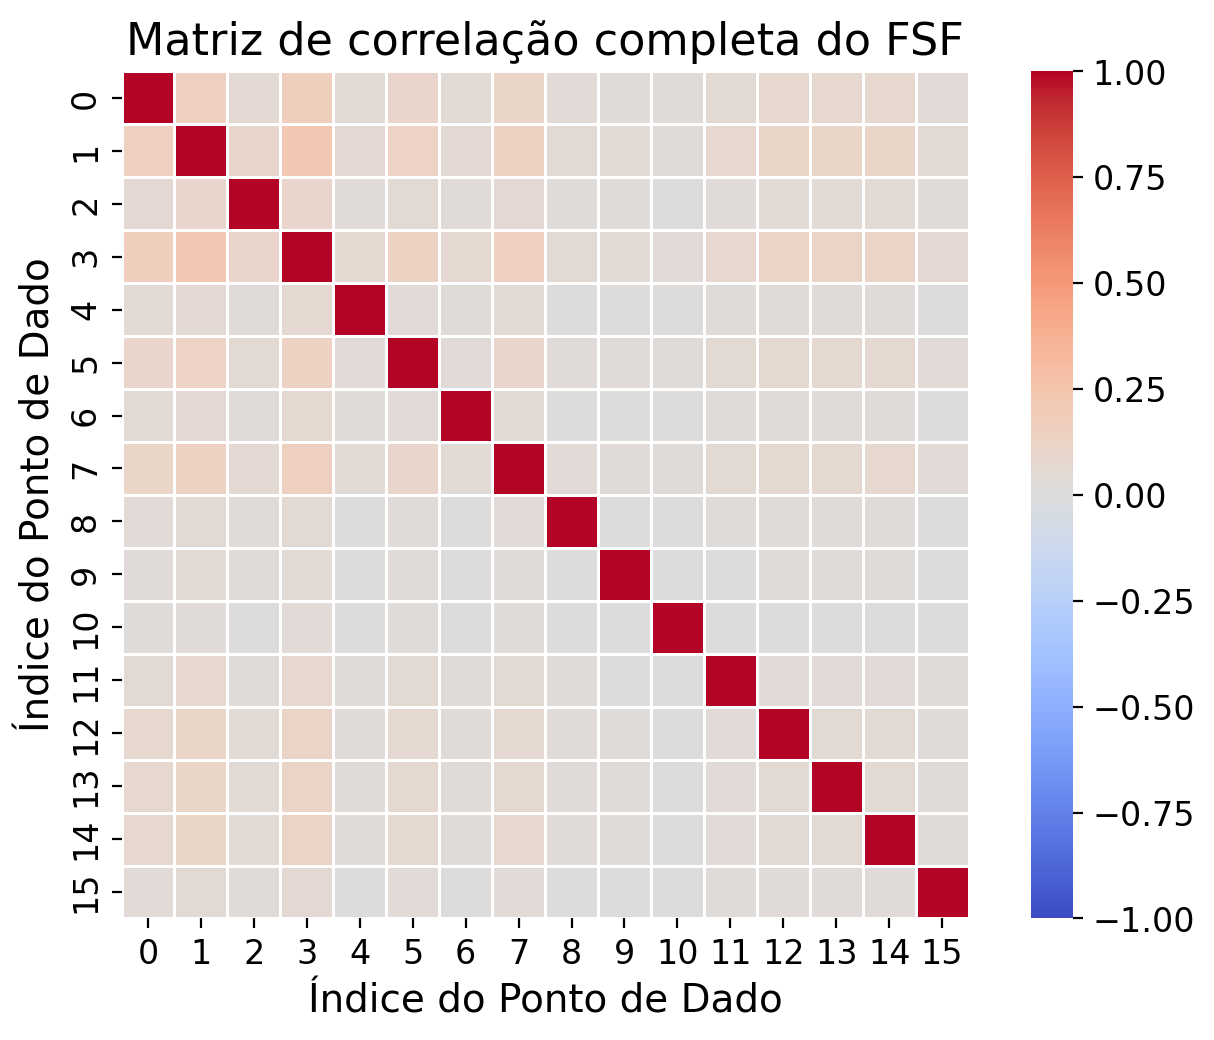

In [26]:
plt.figure(figsize=(8, 5.5))
sns.heatmap(mat_corr_FSF, cmap='coolwarm', vmin=-1, vmax=1, annot=False, square=True, linewidths=.5)
plt.title("Matriz de correlação completa do FSF")
plt.xlabel("Índice do Ponto de Dado")
plt.ylabel("Índice do Ponto de Dado")
plt.show()

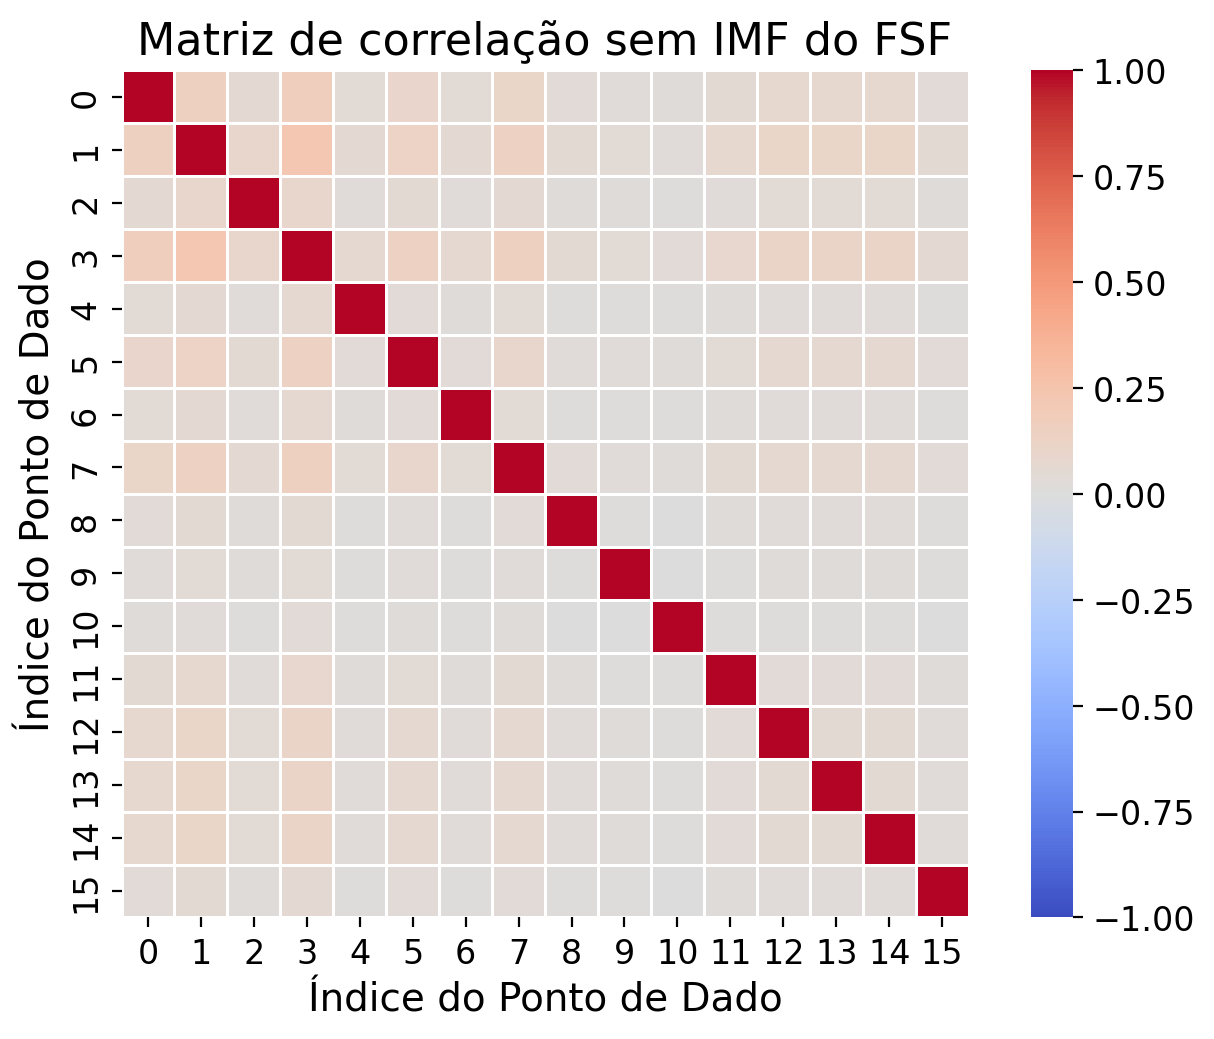

In [28]:
plt.figure(figsize=(8, 5.5))
sns.heatmap(mat_corr_FSF_noimf, cmap='coolwarm', vmin=-1, vmax=1, annot=False, square=True, linewidths=.5)
plt.title("Matriz de correlação sem IMF do FSF")
plt.xlabel("Índice do Ponto de Dado")
plt.ylabel("Índice do Ponto de Dado")
plt.show()

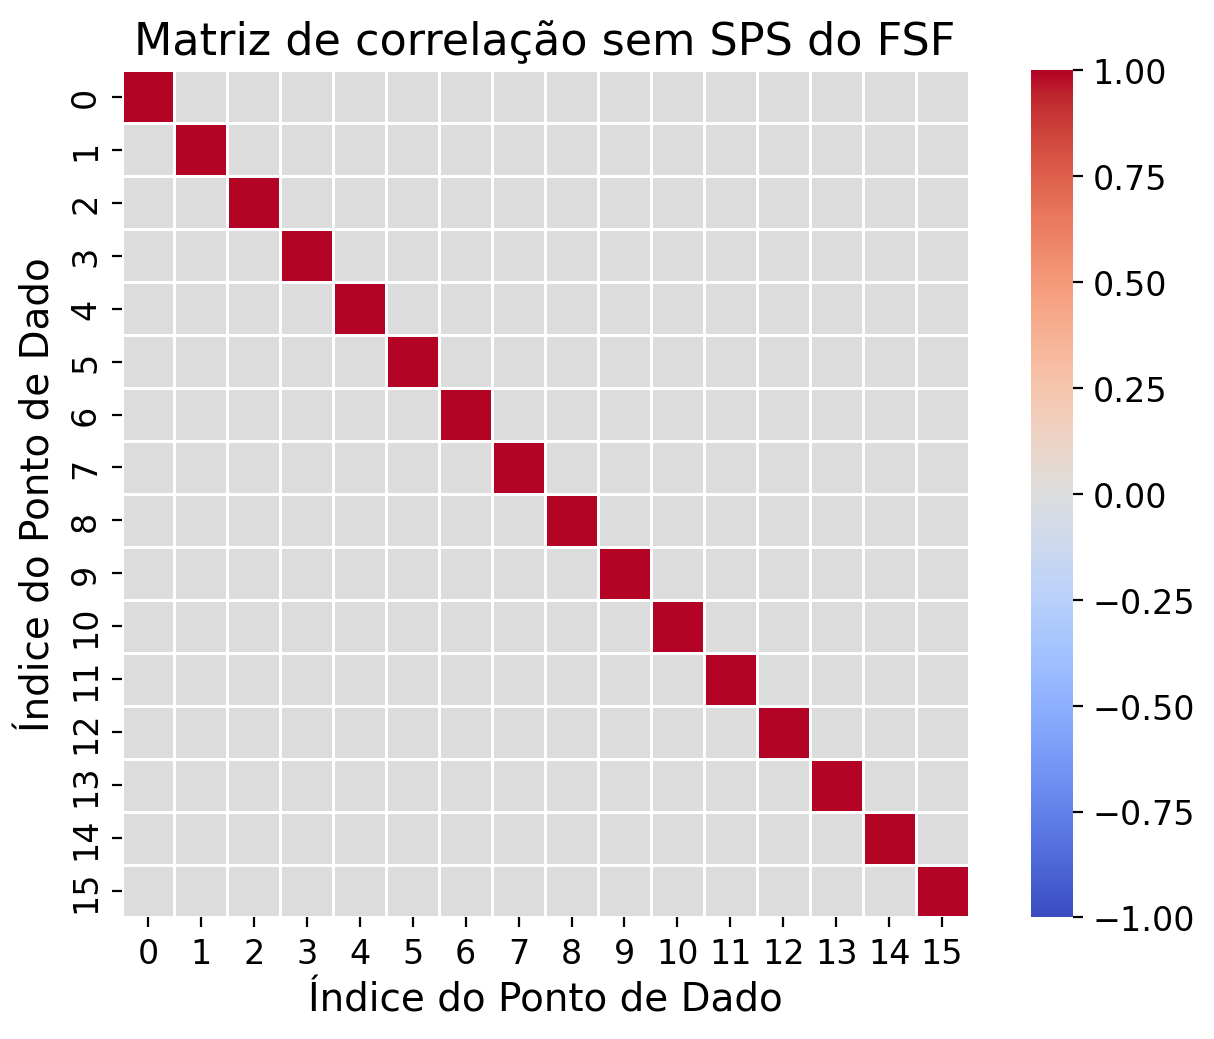

In [33]:
plt.figure(figsize=(8, 5.5))
sns.heatmap(mat_corr_FSF_nosps, cmap='coolwarm', vmin=-1, vmax=1, annot=False, square=True, linewidths=.5)
plt.title("Matriz de correlação sem SPS do FSF")
plt.xlabel("Índice do Ponto de Dado")
plt.ylabel("Índice do Ponto de Dado")
plt.show()

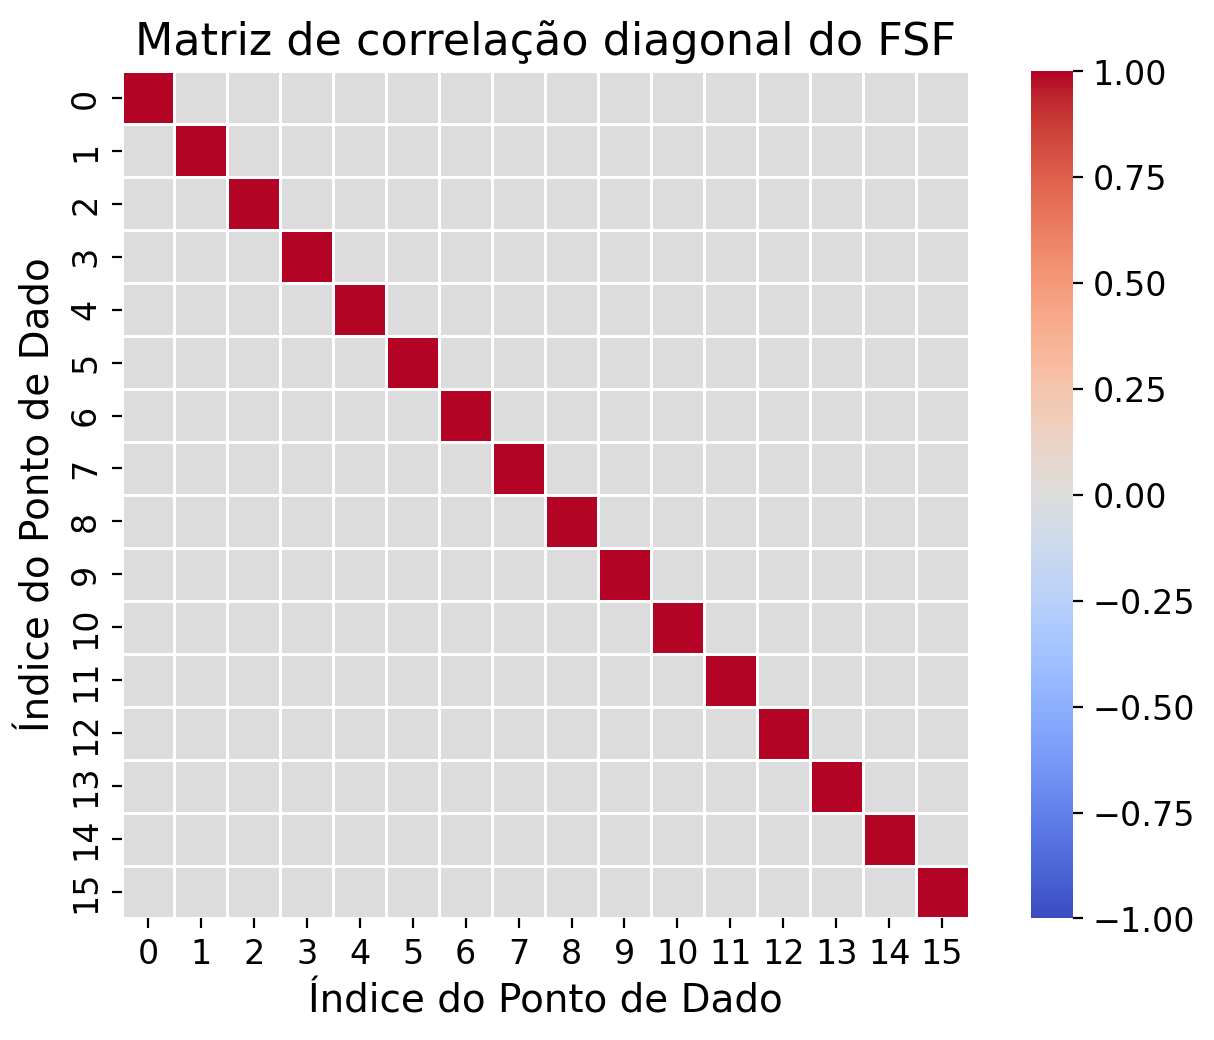

In [39]:
plt.figure(figsize=(8, 5.5))
sns.heatmap(mat_corr_FSF_diag, cmap='coolwarm', vmin=-1, vmax=1, annot=False, square=True, linewidths=.5)
plt.title("Matriz de correlação diagonal do FSF")
plt.xlabel("Índice do Ponto de Dado")
plt.ylabel("Índice do Ponto de Dado")
plt.show()

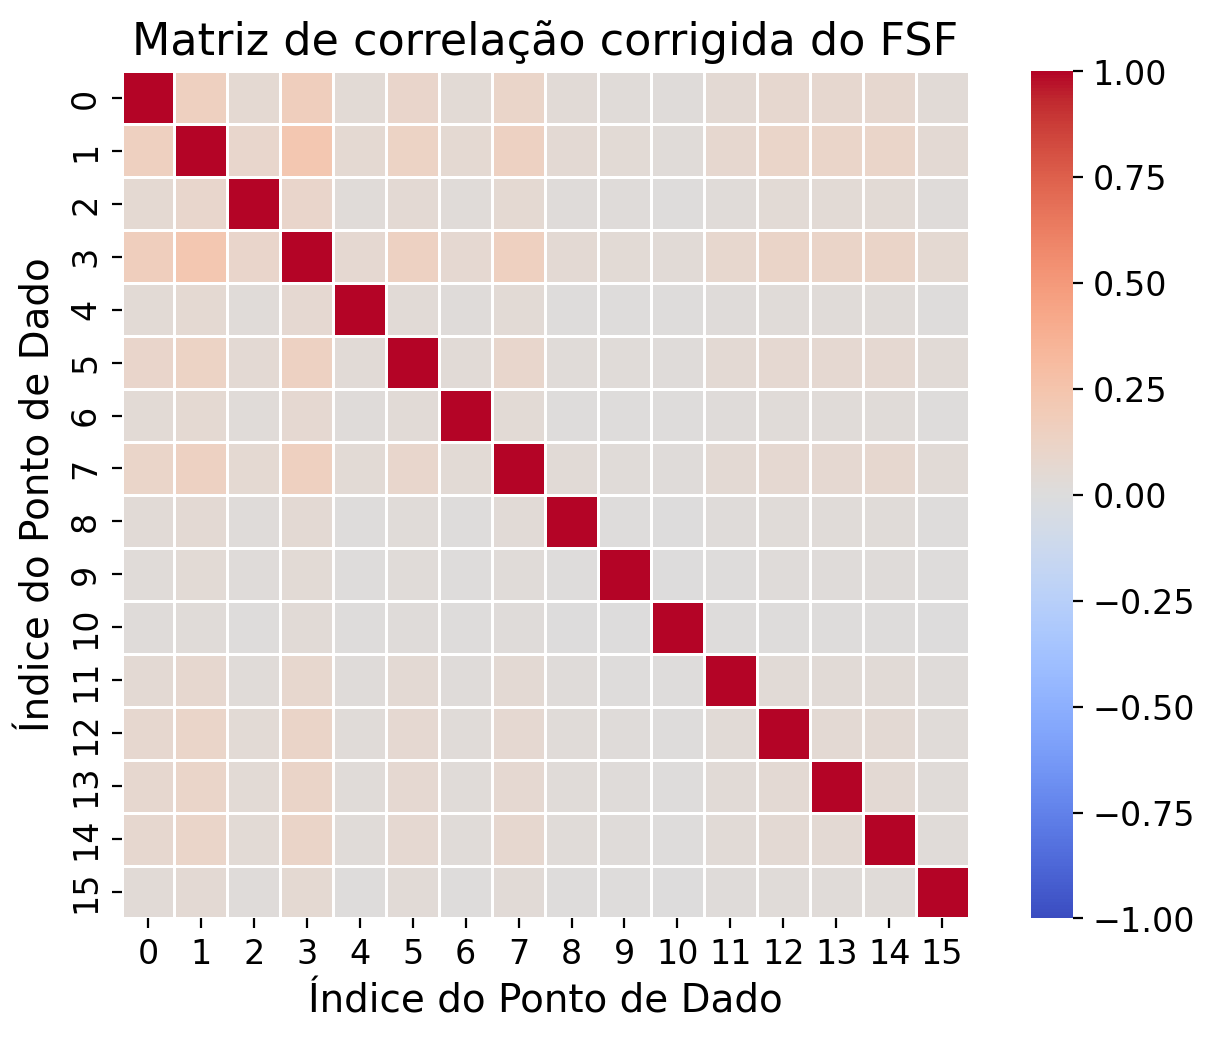

In [40]:
plt.figure(figsize=(8, 5.5))
sns.heatmap(mat_corr_FSF_corr, cmap='coolwarm', vmin=-1, vmax=1, annot=False, square=True, linewidths=.5)
plt.title("Matriz de correlação corrigida do FSF")
plt.xlabel("Índice do Ponto de Dado")
plt.ylabel("Índice do Ponto de Dado")
plt.show()

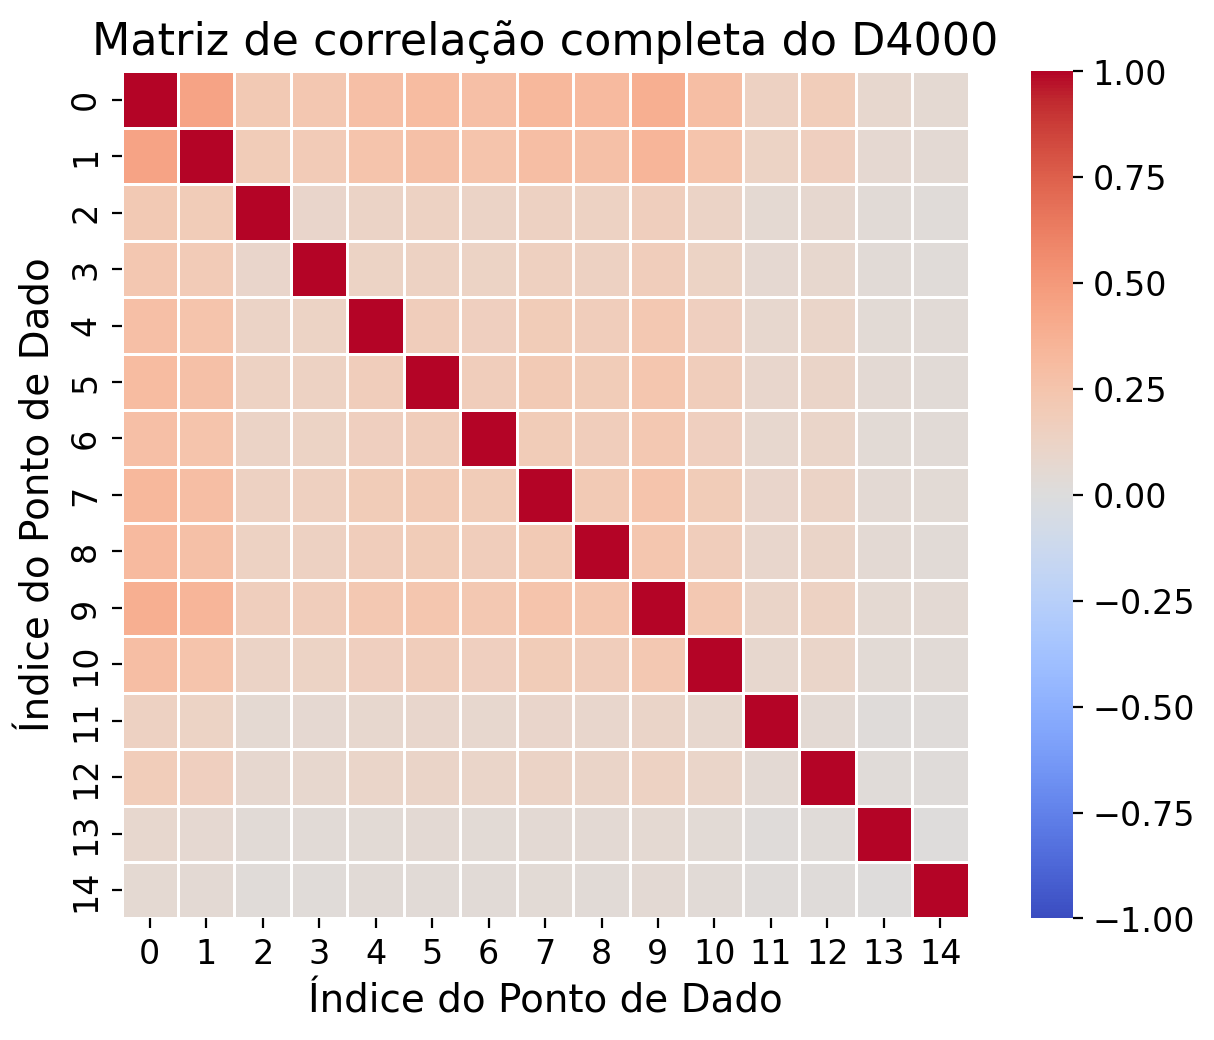

In [41]:
plt.figure(figsize=(8, 5.5))
sns.heatmap(mat_corr_D4000, cmap='coolwarm', vmin=-1, vmax=1, annot=False, square=True, linewidths=.5)
plt.title("Matriz de correlação completa do D4000")
plt.xlabel("Índice do Ponto de Dado")
plt.ylabel("Índice do Ponto de Dado")
plt.show()

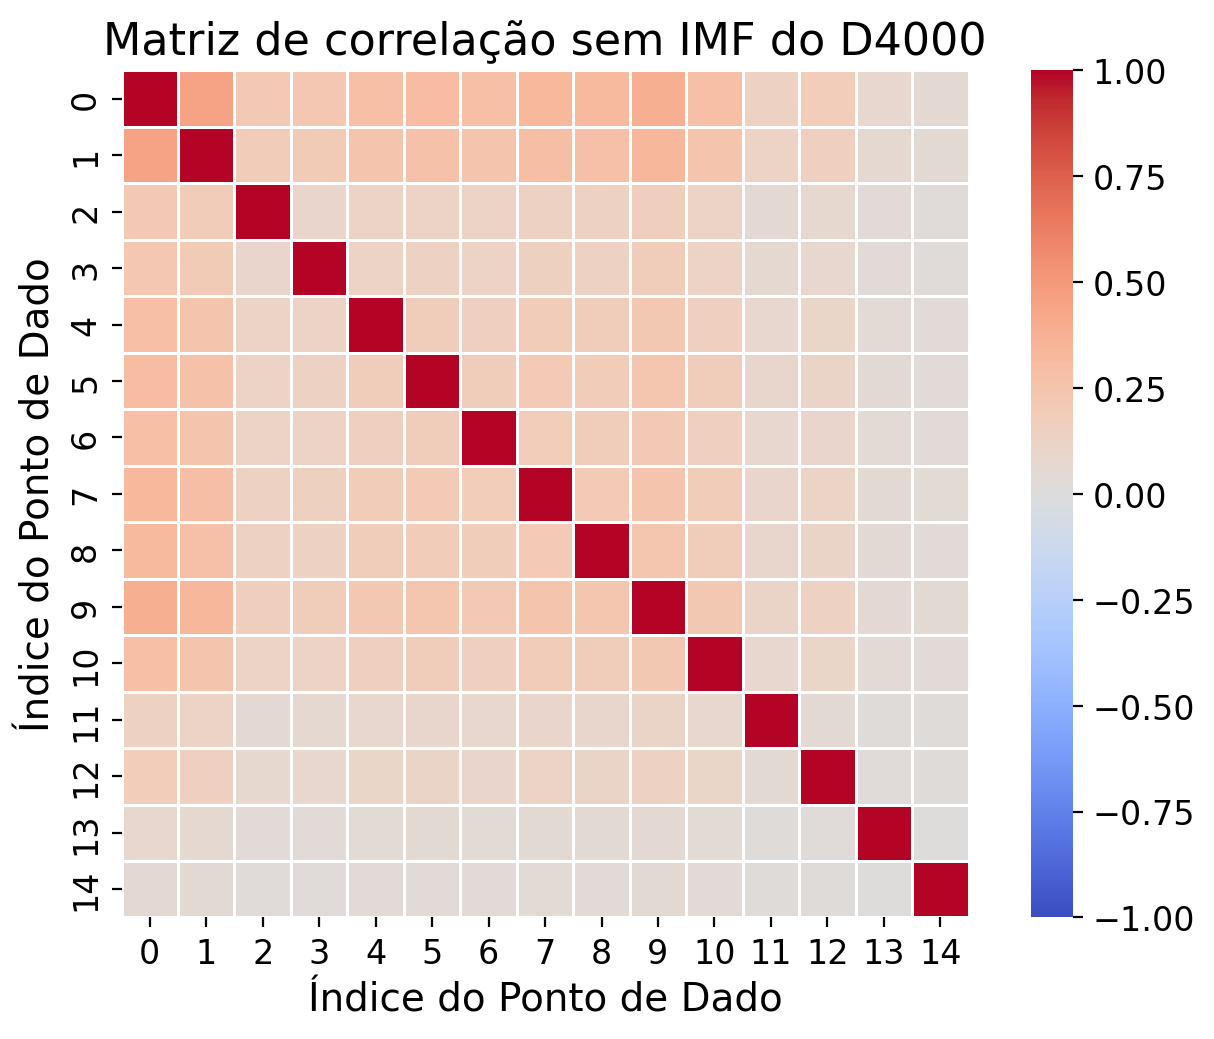

In [42]:
plt.figure(figsize=(8, 5.5))
sns.heatmap(mat_corr_D4000_noimf, cmap='coolwarm', vmin=-1, vmax=1, annot=False, square=True, linewidths=.5)
plt.title("Matriz de correlação sem IMF do D4000")
plt.xlabel("Índice do Ponto de Dado")
plt.ylabel("Índice do Ponto de Dado")
plt.show()

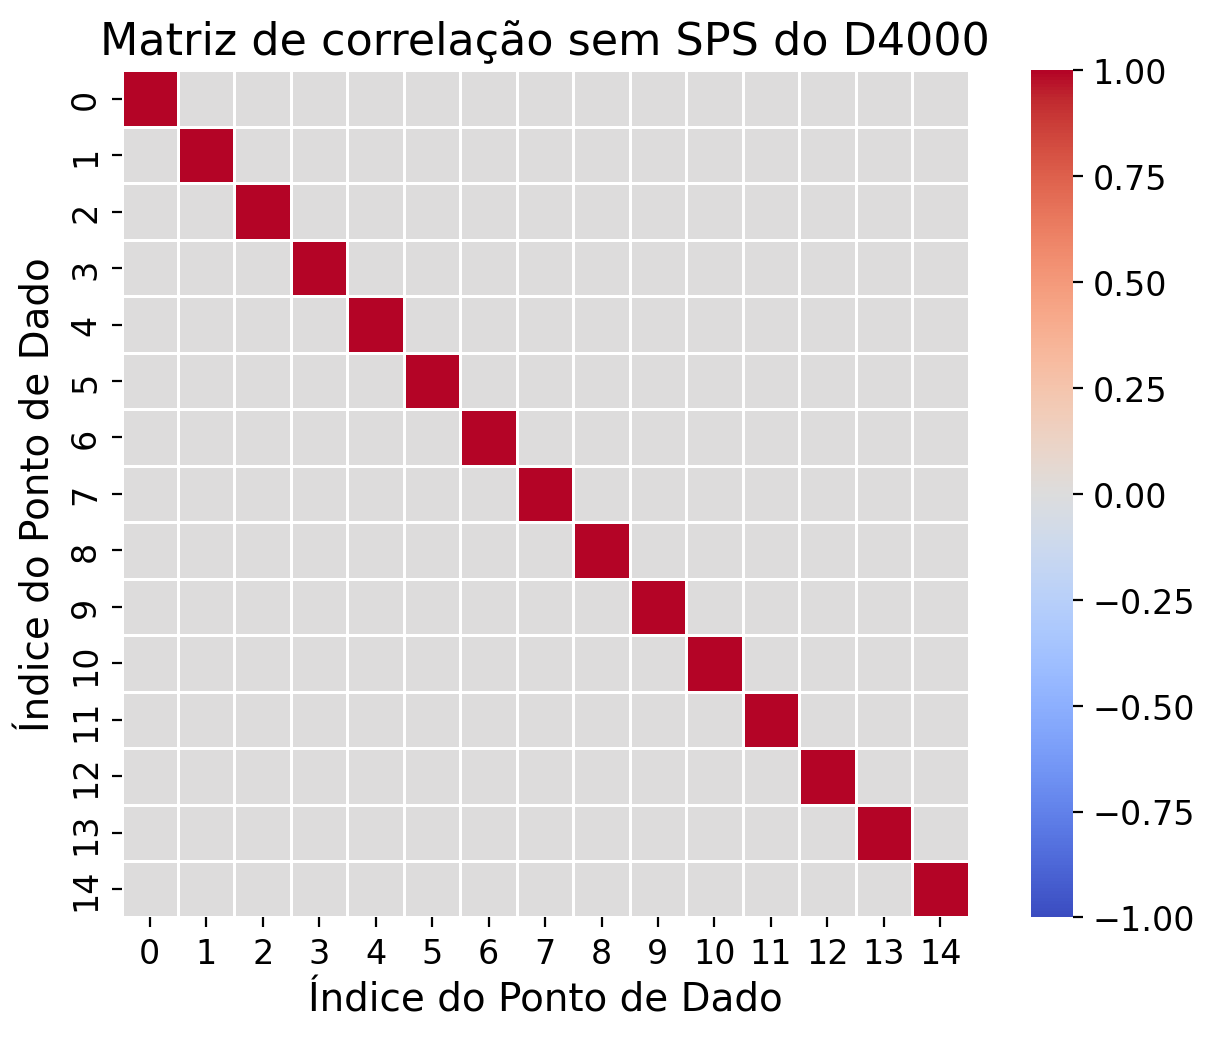

In [43]:
plt.figure(figsize=(8, 5.5))
sns.heatmap(mat_corr_D4000_nosps, cmap='coolwarm', vmin=-1, vmax=1, annot=False, square=True, linewidths=.5)
plt.title("Matriz de correlação sem SPS do D4000")
plt.xlabel("Índice do Ponto de Dado")
plt.ylabel("Índice do Ponto de Dado")
plt.show()

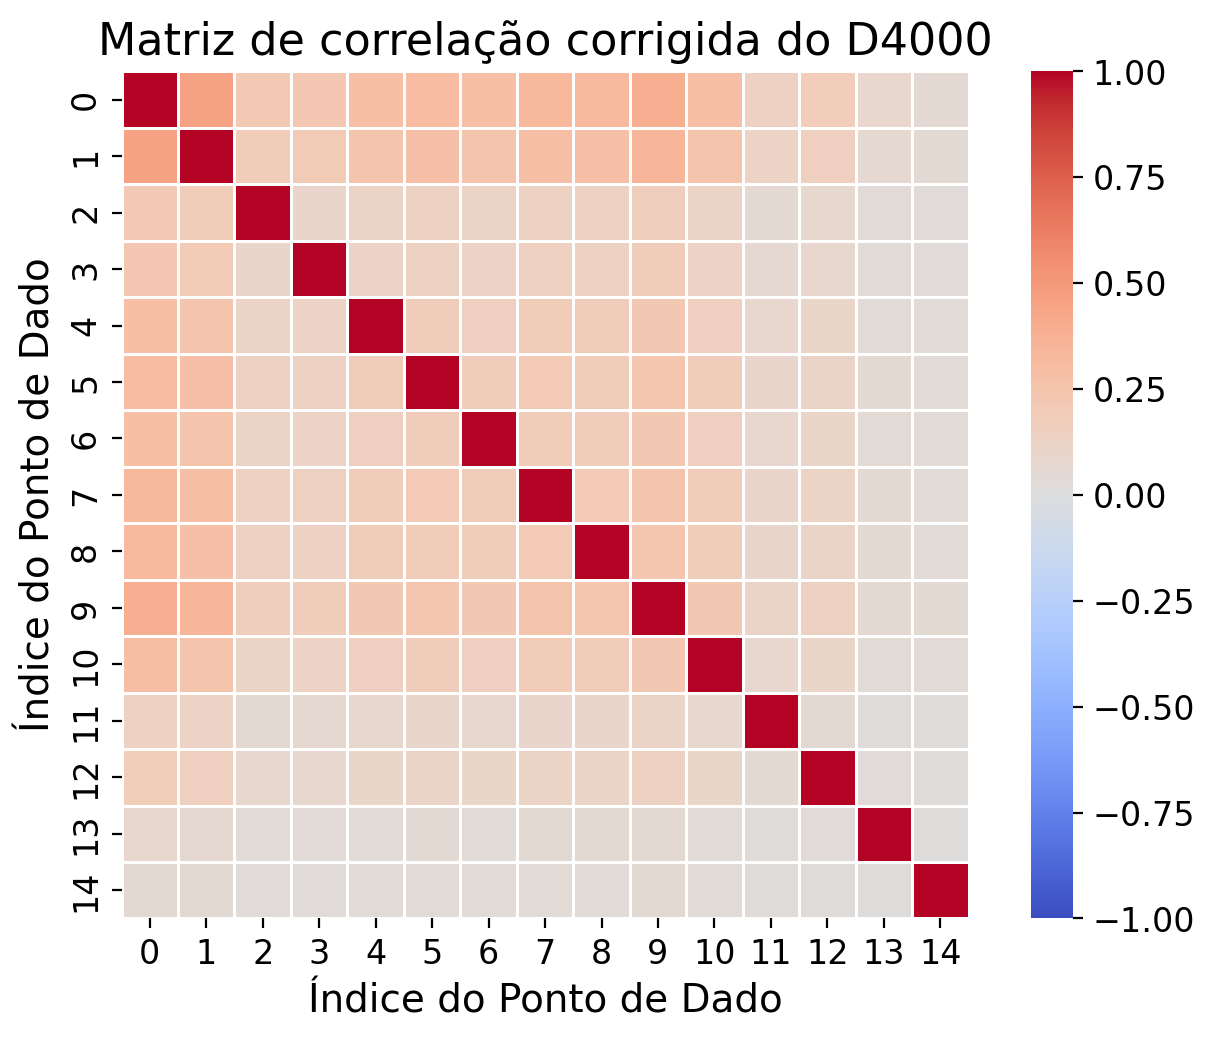

In [44]:
plt.figure(figsize=(8, 5.5))
sns.heatmap(mat_corr_D4000_corr, cmap='coolwarm', vmin=-1, vmax=1, annot=False, square=True, linewidths=.5)
plt.title("Matriz de correlação corrigida do D4000")
plt.xlabel("Índice do Ponto de Dado")
plt.ylabel("Índice do Ponto de Dado")
plt.show()